In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit


data = pd.read_csv('hepatitis.csv')

In [2]:
#data.head()
hepatitis_df = data
hepatitis_df.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [3]:
hepatitis_df['steroid'].fillna(hepatitis_df['steroid'].mode()[0], inplace = True)
hepatitis_df['fatigue'].fillna(hepatitis_df['fatigue'].mode()[0], inplace = True)
hepatitis_df['malaise'].fillna(hepatitis_df['malaise'].mode()[0], inplace = True)
hepatitis_df['anorexia'].fillna(hepatitis_df['anorexia'].mode()[0], inplace = True)
hepatitis_df['liver_big'].fillna(hepatitis_df['liver_big'].mode()[0], inplace = True)
hepatitis_df['liver_firm'].fillna(hepatitis_df['liver_firm'].mode()[0], inplace = True)
hepatitis_df['spleen_palpable'].fillna(hepatitis_df['spleen_palpable'].mode()[0], inplace = True)
hepatitis_df['spiders'].fillna(hepatitis_df['spiders'].mode()[0], inplace = True)
hepatitis_df['ascites'].fillna(hepatitis_df['ascites'].mode()[0], inplace = True)
hepatitis_df['varices'].fillna(hepatitis_df['varices'].mode()[0], inplace = True)

hepatitis_df['bilirubin'].fillna(hepatitis_df['bilirubin'].mean(), inplace = True)
hepatitis_df['alk_phosphate'].fillna(hepatitis_df['alk_phosphate'].mean(), inplace = True)
hepatitis_df['sgot'].fillna(hepatitis_df['sgot'].mean(), inplace = True)
hepatitis_df['protime'].fillna(hepatitis_df['protime'].mean(), inplace = True)
hepatitis_df['histology'].fillna(hepatitis_df['histology'].mode()[0], inplace = True)

hepatitis_df['albumin'].fillna(hepatitis_df['albumin'].mean(), inplace = True)

In [4]:
le = preprocessing.LabelEncoder()
hepatitis_df['sex'] = le.fit_transform(hepatitis_df['sex'])
hepatitis_df['steroid'] = le.fit_transform(hepatitis_df['steroid'])
hepatitis_df['antivirals'] = le.fit_transform(hepatitis_df['antivirals'])
hepatitis_df['fatigue'] = le.fit_transform(hepatitis_df['fatigue'])
hepatitis_df['malaise'] = le.fit_transform(hepatitis_df['malaise'])
hepatitis_df['anorexia'] = le.fit_transform(hepatitis_df['anorexia'])
hepatitis_df['liver_big'] = le.fit_transform(hepatitis_df['liver_big'])
hepatitis_df['liver_firm'] = le.fit_transform(hepatitis_df['liver_firm'])
hepatitis_df['spleen_palpable'] = le.fit_transform(hepatitis_df['spleen_palpable'])
hepatitis_df['spiders'] = le.fit_transform(hepatitis_df['spiders'])
hepatitis_df['varices'] = le.fit_transform(hepatitis_df['varices'])
hepatitis_df['ascites'] = le.fit_transform(hepatitis_df['ascites'])
hepatitis_df['histology'] = le.fit_transform(hepatitis_df['histology'])
hepatitis_df['class'] = le.fit_transform(hepatitis_df['class'])

In [23]:
hepatitis_df.corr()['class']
test_data = pd.DataFrame(hepatitis_df['class'])
train_data = hepatitis_df.drop(['class'], axis=1)

hp_xtrain, hp_xtest, hp_ytrain, hp_ytest = train_test_split(train_data, test_data, test_size=0.2)
hp_ytrain.shape

(124, 1)

# StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(hp_xtrain)
hp_xtrn=scaler.transform(hp_xtrain)
hp_xtst=scaler.transform(hp_xtest)

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': np.linspace(1, 10, 10),
    'class_weight':['balanced', None],
    'random_state':np.linspace(1, 15, 15,dtype=int)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5)
clf.fit(hp_xtrn, hp_ytrain)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] C=1.0, class_weight=balanced, random_state=1 ....................
[CV]  C=1.0, class_weight=balanced, random_state=1, score=0.8076923076923077, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=1 ....................
[CV]  C=1.0, class_weight=balanced, random_state=1, score=0.76, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=1 ....................
[CV]  C=1.0, class_weight=balanced, random_state=1, score=0.8, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=1 ....................
[CV]  C=1.0, class_weight=balanced, random_state=1, score=0.75, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=1 ....................
[CV]  C=1.0, class_weight=balanced, random_state=1, score=0.8333333333333334, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=2 ....................
[CV]  C=1.0, class_weight=balanced, random_state=2, score=0.8076923076923077, total=   0.0s
[

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1.0, class_weight=balanced, random_state=9, score=0.8, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=9 ....................
[CV]  C=1.0, class_weight=balanced, random_state=9, score=0.75, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=9 ....................
[CV]  C=1.0, class_weight=balanced, random_state=9, score=0.8333333333333334, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=10 ...................
[CV]  C=1.0, class_weight=balanced, random_state=10, score=0.8076923076923077, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=10 ...................
[CV]  C=1.0, class_weight=balanced, random_state=10, score=0.76, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=10 ...................
[CV]  C=1.0, class_weight=balanced, random_state=10, score=0.8, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=10 ...................
[CV]  C=1.0, class_weight=balanced, random_state=10, score=0.75, total=   0.0

[CV]  C=1.0, class_weight=None, random_state=12, score=0.9166666666666666, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=13 .......................
[CV]  C=1.0, class_weight=None, random_state=13, score=0.8846153846153846, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=13 .......................
[CV]  C=1.0, class_weight=None, random_state=13, score=0.8, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=13 .......................
[CV]  C=1.0, class_weight=None, random_state=13, score=0.84, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=13 .......................
[CV]  C=1.0, class_weight=None, random_state=13, score=0.7916666666666666, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=13 .......................
[CV]  C=1.0, class_weight=None, random_state=13, score=0.9166666666666666, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=14 .......................
[CV]  C=1.0, class_weight=None, random_state=14, score=0.884615384615

[CV] C=2.0, class_weight=None, random_state=2 ........................
[CV]  C=2.0, class_weight=None, random_state=2, score=0.7916666666666666, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=2 ........................
[CV]  C=2.0, class_weight=None, random_state=2, score=0.875, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=3 ........................
[CV]  C=2.0, class_weight=None, random_state=3, score=0.8846153846153846, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=3 ........................
[CV]  C=2.0, class_weight=None, random_state=3, score=0.8, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=3 ........................
[CV]  C=2.0, class_weight=None, random_state=3, score=0.84, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=3 ........................
[CV]  C=2.0, class_weight=None, random_state=3, score=0.7916666666666666, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=3 ........................
[CV]  C=2.0, clas

[CV]  C=3.0, class_weight=balanced, random_state=7, score=0.75, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=7 ....................
[CV]  C=3.0, class_weight=balanced, random_state=7, score=0.8333333333333334, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=8 ....................
[CV]  C=3.0, class_weight=balanced, random_state=8, score=0.8076923076923077, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=8 ....................
[CV]  C=3.0, class_weight=balanced, random_state=8, score=0.72, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=8 ....................
[CV]  C=3.0, class_weight=balanced, random_state=8, score=0.8, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=8 ....................
[CV]  C=3.0, class_weight=balanced, random_state=8, score=0.75, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=8 ....................
[CV]  C=3.0, class_weight=balanced, random_state=8, score=0.8333333333333334, t

[CV]  C=3.0, class_weight=None, random_state=13, score=0.84, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=13 .......................
[CV]  C=3.0, class_weight=None, random_state=13, score=0.7916666666666666, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=13 .......................
[CV]  C=3.0, class_weight=None, random_state=13, score=0.875, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=14 .......................
[CV]  C=3.0, class_weight=None, random_state=14, score=0.8461538461538461, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=14 .......................
[CV]  C=3.0, class_weight=None, random_state=14, score=0.8, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=14 .......................
[CV]  C=3.0, class_weight=None, random_state=14, score=0.84, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=14 .......................
[CV]  C=3.0, class_weight=None, random_state=14, score=0.7916666666666666, total=   0.0s
[CV] C=

[CV]  C=4.0, class_weight=None, random_state=2, score=0.7916666666666666, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=2 ........................
[CV]  C=4.0, class_weight=None, random_state=2, score=0.8333333333333334, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=3 ........................
[CV]  C=4.0, class_weight=None, random_state=3, score=0.8461538461538461, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=3 ........................
[CV]  C=4.0, class_weight=None, random_state=3, score=0.8, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=3 ........................
[CV]  C=4.0, class_weight=None, random_state=3, score=0.84, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=3 ........................
[CV]  C=4.0, class_weight=None, random_state=3, score=0.7916666666666666, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=3 ........................
[CV]  C=4.0, class_weight=None, random_state=3, score=0.8333333333333334, t

[CV]  C=5.0, class_weight=balanced, random_state=7, score=0.8, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=7 ....................
[CV]  C=5.0, class_weight=balanced, random_state=7, score=0.75, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=7 ....................
[CV]  C=5.0, class_weight=balanced, random_state=7, score=0.8333333333333334, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=8 ....................
[CV]  C=5.0, class_weight=balanced, random_state=8, score=0.8076923076923077, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=8 ....................
[CV]  C=5.0, class_weight=balanced, random_state=8, score=0.72, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=8 ....................
[CV]  C=5.0, class_weight=balanced, random_state=8, score=0.8, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=8 ....................
[CV]  C=5.0, class_weight=balanced, random_state=8, score=0.75, total=   0.0s
[C

[CV]  C=5.0, class_weight=None, random_state=4, score=0.8461538461538461, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=4 ........................
[CV]  C=5.0, class_weight=None, random_state=4, score=0.8, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=4 ........................
[CV]  C=5.0, class_weight=None, random_state=4, score=0.84, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=4 ........................
[CV]  C=5.0, class_weight=None, random_state=4, score=0.75, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=4 ........................
[CV]  C=5.0, class_weight=None, random_state=4, score=0.8333333333333334, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=5 ........................
[CV]  C=5.0, class_weight=None, random_state=5, score=0.8461538461538461, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=5 ........................
[CV]  C=5.0, class_weight=None, random_state=5, score=0.8, total=   0.0s
[CV] C=5.0, clas

[CV]  C=6.0, class_weight=balanced, random_state=2, score=0.8, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=2 ....................
[CV]  C=6.0, class_weight=balanced, random_state=2, score=0.75, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=2 ....................
[CV]  C=6.0, class_weight=balanced, random_state=2, score=0.8333333333333334, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=3 ....................
[CV]  C=6.0, class_weight=balanced, random_state=3, score=0.8076923076923077, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=3 ....................
[CV]  C=6.0, class_weight=balanced, random_state=3, score=0.72, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=3 ....................
[CV]  C=6.0, class_weight=balanced, random_state=3, score=0.8, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=3 ....................
[CV]  C=6.0, class_weight=balanced, random_state=3, score=0.75, total=   0.0s
[C

[CV]  C=6.0, class_weight=balanced, random_state=15, score=0.8333333333333334, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=1 ........................
[CV]  C=6.0, class_weight=None, random_state=1, score=0.8461538461538461, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=1 ........................
[CV]  C=6.0, class_weight=None, random_state=1, score=0.8, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=1 ........................
[CV]  C=6.0, class_weight=None, random_state=1, score=0.8, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=1 ........................
[CV]  C=6.0, class_weight=None, random_state=1, score=0.75, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=1 ........................
[CV]  C=6.0, class_weight=None, random_state=1, score=0.8333333333333334, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=2 ........................
[CV]  C=6.0, class_weight=None, random_state=2, score=0.8461538461538461, total=   0.

[CV]  C=7.0, class_weight=balanced, random_state=6, score=0.8, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=6 ....................
[CV]  C=7.0, class_weight=balanced, random_state=6, score=0.75, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=6 ....................
[CV]  C=7.0, class_weight=balanced, random_state=6, score=0.8333333333333334, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=7 ....................
[CV]  C=7.0, class_weight=balanced, random_state=7, score=0.8076923076923077, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=7 ....................
[CV]  C=7.0, class_weight=balanced, random_state=7, score=0.72, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=7 ....................
[CV]  C=7.0, class_weight=balanced, random_state=7, score=0.8, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=7 ....................
[CV]  C=7.0, class_weight=balanced, random_state=7, score=0.75, total=   0.0s
[C

[CV]  C=7.0, class_weight=None, random_state=5, score=0.75, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=5 ........................
[CV]  C=7.0, class_weight=None, random_state=5, score=0.8333333333333334, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=6 ........................
[CV]  C=7.0, class_weight=None, random_state=6, score=0.8461538461538461, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=6 ........................
[CV]  C=7.0, class_weight=None, random_state=6, score=0.8, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=6 ........................
[CV]  C=7.0, class_weight=None, random_state=6, score=0.8, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=6 ........................
[CV]  C=7.0, class_weight=None, random_state=6, score=0.75, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=6 ........................
[CV]  C=7.0, class_weight=None, random_state=6, score=0.8333333333333334, total=   0.0s
[CV] C=7.0, clas

[CV]  C=8.0, class_weight=balanced, random_state=7, score=0.75, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=7 ....................
[CV]  C=8.0, class_weight=balanced, random_state=7, score=0.8333333333333334, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=8 ....................
[CV]  C=8.0, class_weight=balanced, random_state=8, score=0.8076923076923077, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=8 ....................
[CV]  C=8.0, class_weight=balanced, random_state=8, score=0.72, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=8 ....................
[CV]  C=8.0, class_weight=balanced, random_state=8, score=0.8, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=8 ....................
[CV]  C=8.0, class_weight=balanced, random_state=8, score=0.75, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=8 ....................
[CV]  C=8.0, class_weight=balanced, random_state=8, score=0.8333333333333334, t

[CV]  C=8.0, class_weight=None, random_state=11, score=0.8461538461538461, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=11 .......................
[CV]  C=8.0, class_weight=None, random_state=11, score=0.8, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=11 .......................
[CV]  C=8.0, class_weight=None, random_state=11, score=0.8, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=11 .......................
[CV]  C=8.0, class_weight=None, random_state=11, score=0.75, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=11 .......................
[CV]  C=8.0, class_weight=None, random_state=11, score=0.8333333333333334, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=12 .......................
[CV]  C=8.0, class_weight=None, random_state=12, score=0.8461538461538461, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=12 .......................
[CV]  C=8.0, class_weight=None, random_state=12, score=0.8, total=   0.0s
[CV] C=8.0

[CV]  C=9.0, class_weight=balanced, random_state=15, score=0.72, total=   0.0s
[CV] C=9.0, class_weight=balanced, random_state=15 ...................
[CV]  C=9.0, class_weight=balanced, random_state=15, score=0.8, total=   0.0s
[CV] C=9.0, class_weight=balanced, random_state=15 ...................
[CV]  C=9.0, class_weight=balanced, random_state=15, score=0.75, total=   0.0s
[CV] C=9.0, class_weight=balanced, random_state=15 ...................
[CV]  C=9.0, class_weight=balanced, random_state=15, score=0.8333333333333334, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=1 ........................
[CV]  C=9.0, class_weight=None, random_state=1, score=0.8461538461538461, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=1 ........................
[CV]  C=9.0, class_weight=None, random_state=1, score=0.8, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=1 ........................
[CV]  C=9.0, class_weight=None, random_state=1, score=0.8, total=   0.0s
[CV] C=9.0,

[CV]  C=9.0, class_weight=None, random_state=11, score=0.8, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=11 .......................
[CV]  C=9.0, class_weight=None, random_state=11, score=0.8, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=11 .......................
[CV]  C=9.0, class_weight=None, random_state=11, score=0.75, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=11 .......................
[CV]  C=9.0, class_weight=None, random_state=11, score=0.8333333333333334, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=12 .......................
[CV]  C=9.0, class_weight=None, random_state=12, score=0.8461538461538461, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=12 .......................
[CV]  C=9.0, class_weight=None, random_state=12, score=0.8, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=12 .......................
[CV]  C=9.0, class_weight=None, random_state=12, score=0.8, total=   0.0s
[CV] C=9.0, class_weight=

[CV]  C=10.0, class_weight=None, random_state=1, score=0.75, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=1 .......................
[CV]  C=10.0, class_weight=None, random_state=1, score=0.8333333333333334, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=2 .......................
[CV]  C=10.0, class_weight=None, random_state=2, score=0.8461538461538461, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=2 .......................
[CV]  C=10.0, class_weight=None, random_state=2, score=0.8, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=2 .......................
[CV]  C=10.0, class_weight=None, random_state=2, score=0.8, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=2 .......................
[CV]  C=10.0, class_weight=None, random_state=2, score=0.75, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=2 .......................
[CV]  C=10.0, class_weight=None, random_state=2, score=0.8333333333333334, total=   0.0s
[CV] C=10

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    6.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 'class_weight': ['balanced', None], 'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [26]:
clf.best_params_

{'C': 1.0, 'class_weight': None, 'random_state': 1}

In [27]:
lr_ss = LogisticRegression(C=1,class_weight=None,random_state = 1 , verbose=5)
lr_ss.fit(hp_xtrn, hp_ytrain)

[LibLinear]

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=5, warm_start=False)

In [28]:
y_pre = lr_ss.predict(hp_xtst)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pre))
print(confusion_matrix(hp_ytest, y_pre))  
print(classification_report(hp_ytest, y_pre))

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



In [29]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

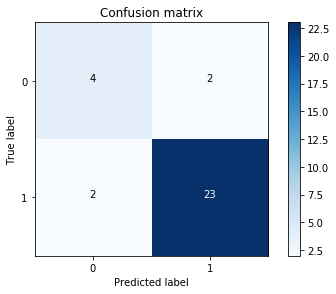

In [30]:
y_pre = lr_ss.predict(hp_xtst)

cnf_matrix_tra = confusion_matrix(hp_ytest, y_pre)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

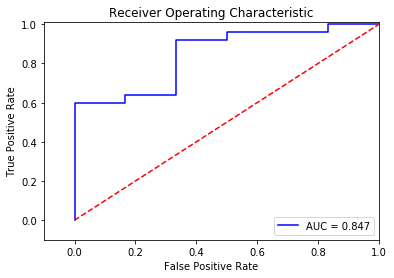

In [31]:
y_pred_sample_score = lr_ss.decision_function(hp_xtst)


fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


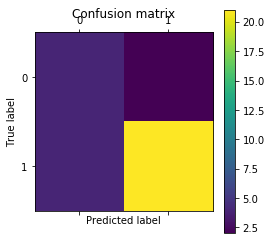



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



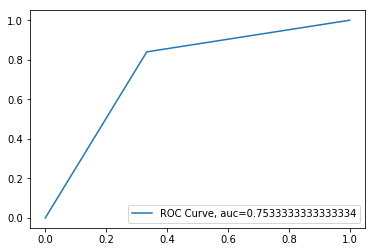

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


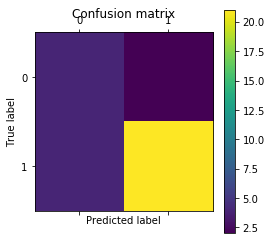



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



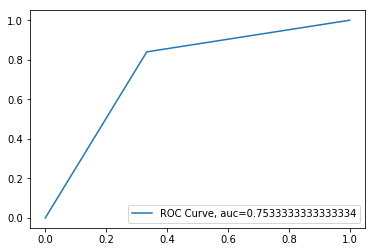

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


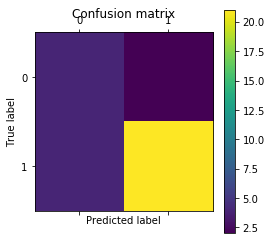



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



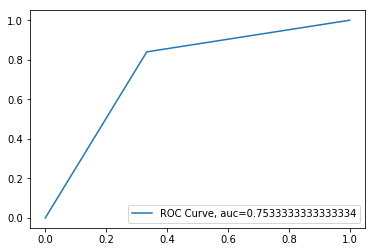

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


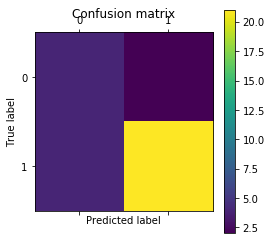



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



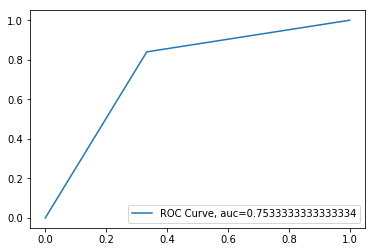

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


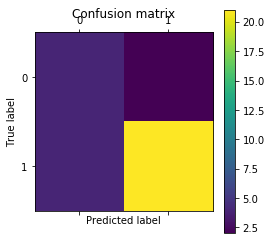



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



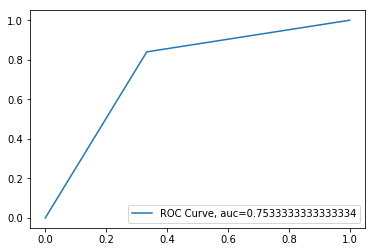

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


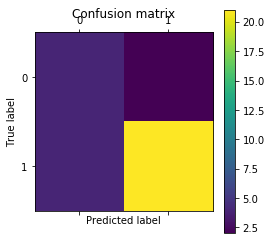



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



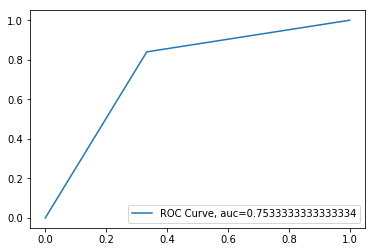

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


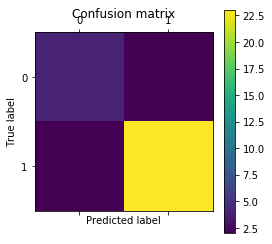



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



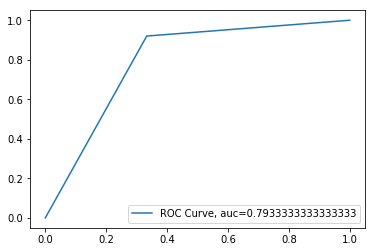

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


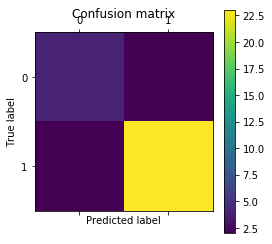



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



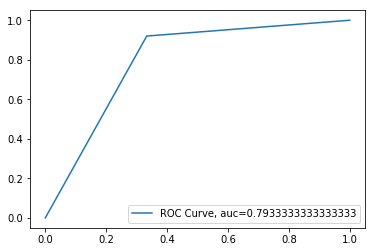

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


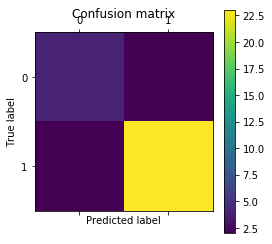



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



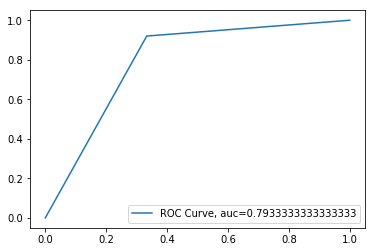

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


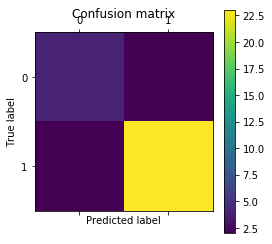



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



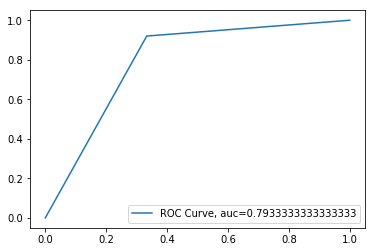

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


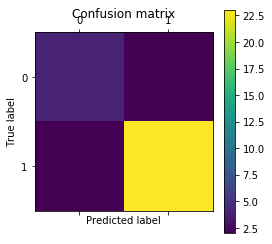



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



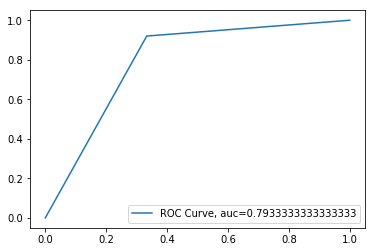

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


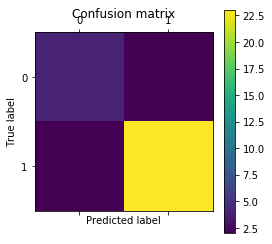



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



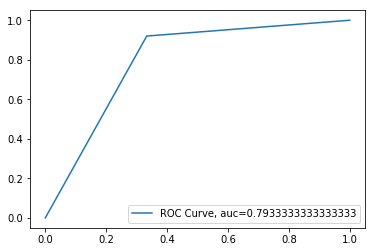

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


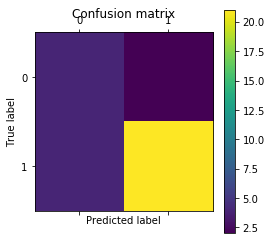



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



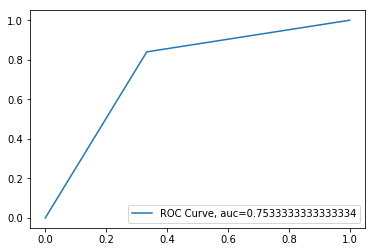

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


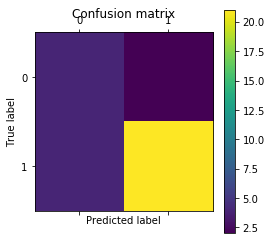



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



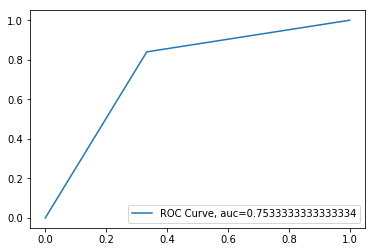

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


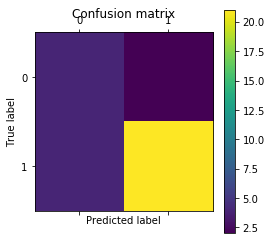



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



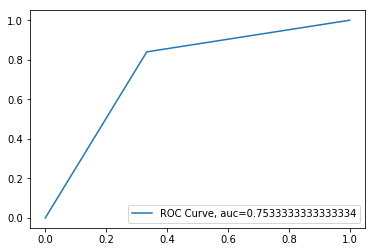

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


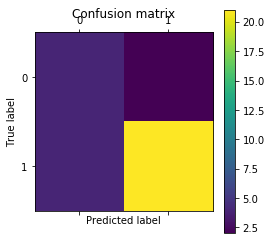



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



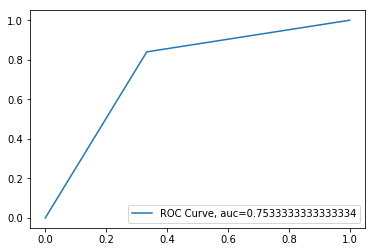

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


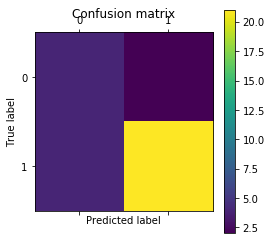



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



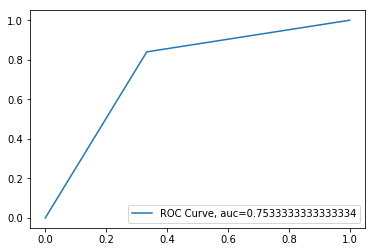

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


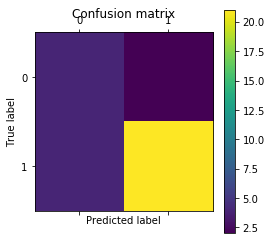



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



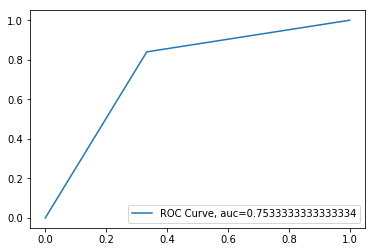

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


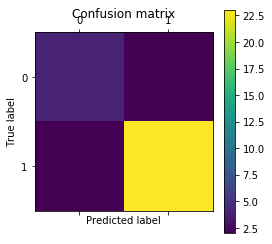



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



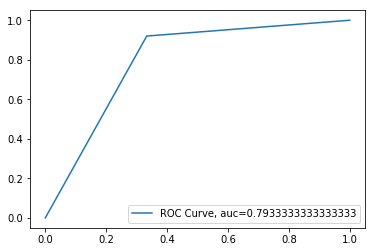

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


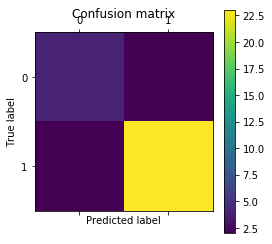



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



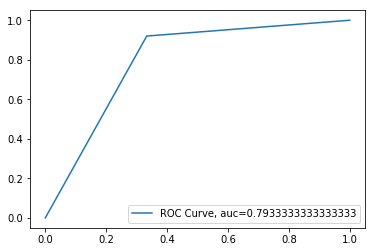

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


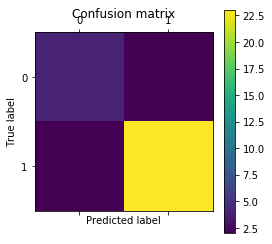



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



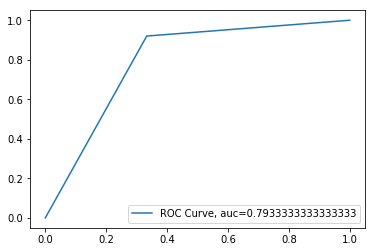

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


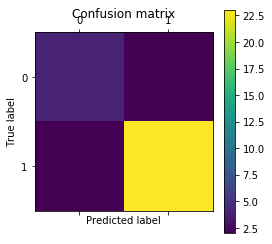



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



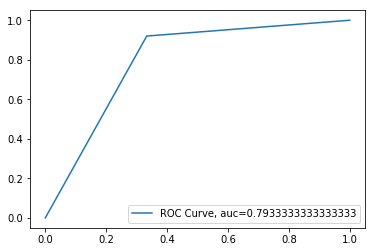

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


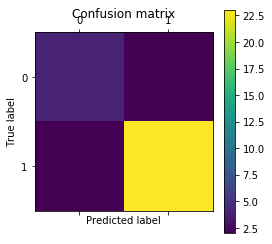



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



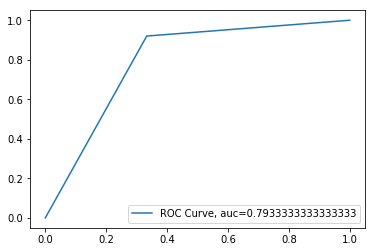

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


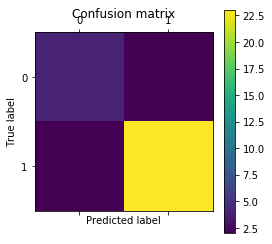



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



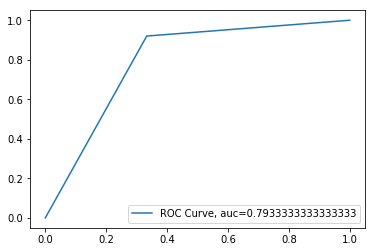

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


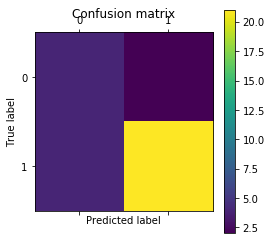



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



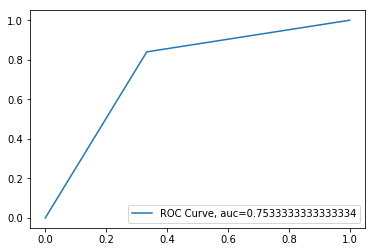

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


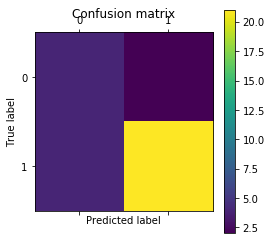



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



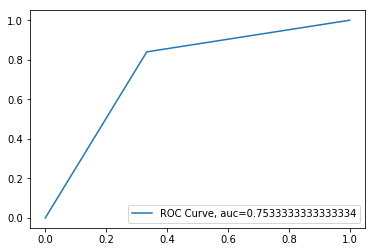

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


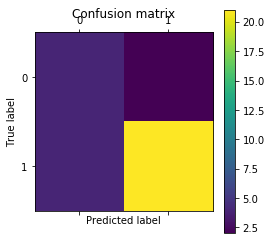



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



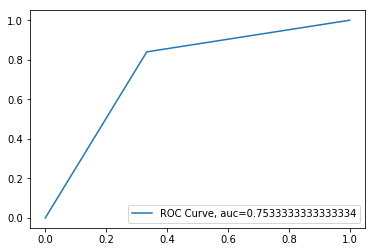

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


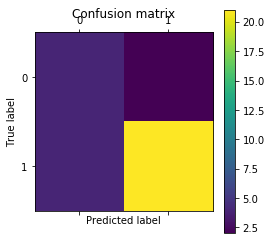



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



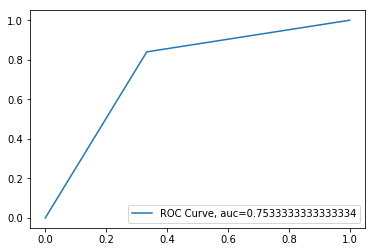

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


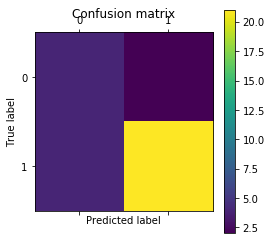



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



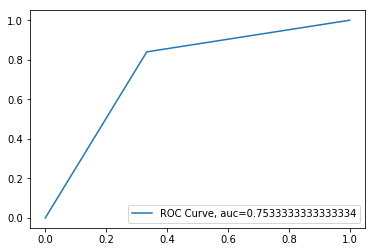

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


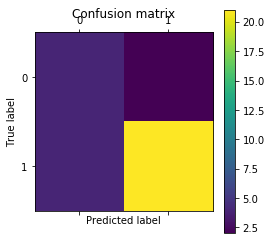



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



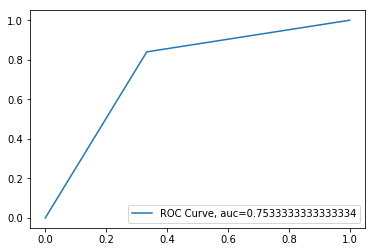

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


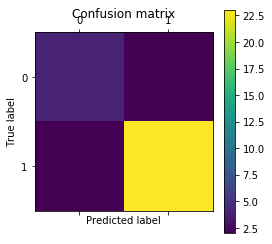



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



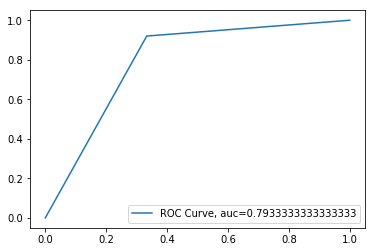

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


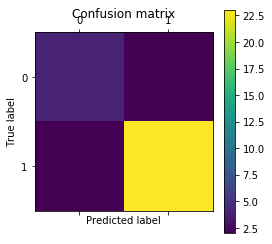



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



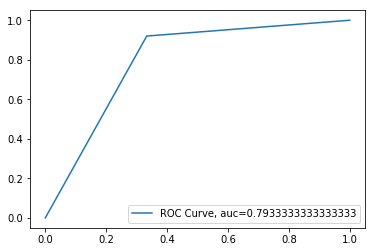

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


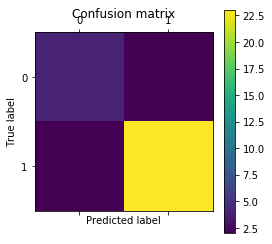



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



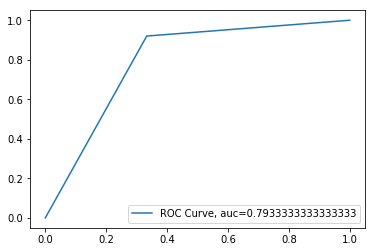

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


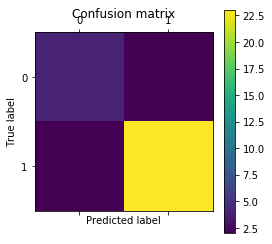



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



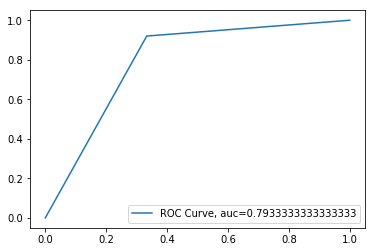

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


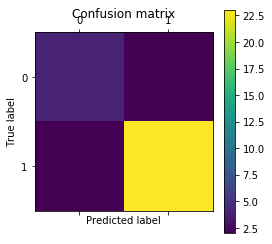



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



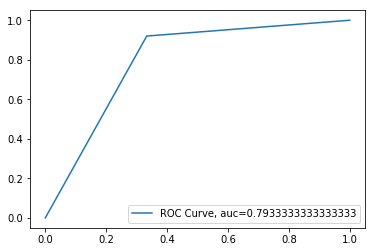

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


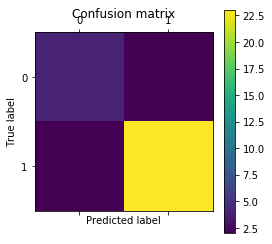



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



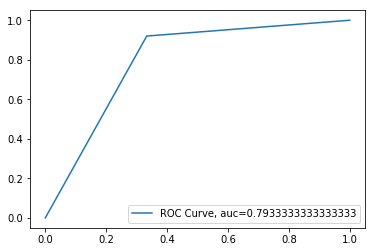

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


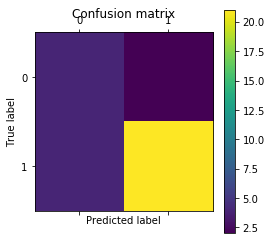



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



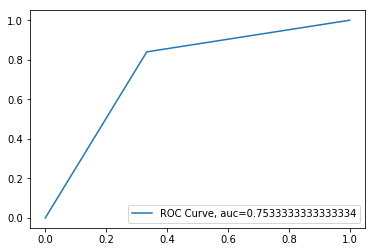

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


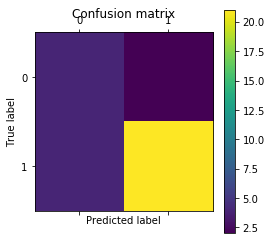



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



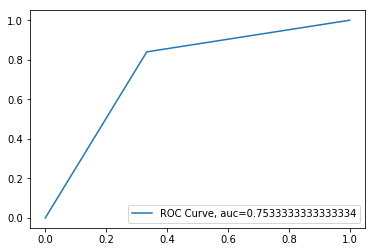

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


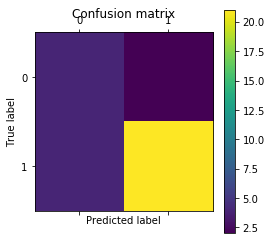



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



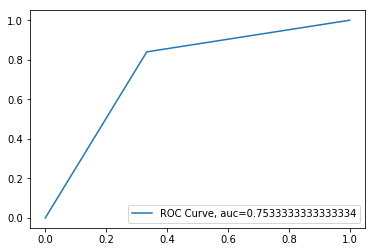

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


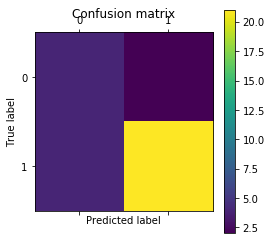



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



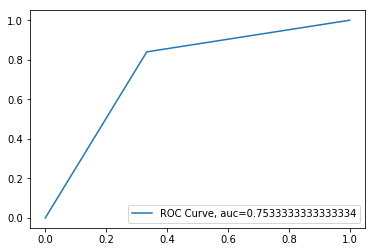

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


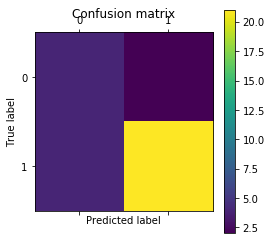



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



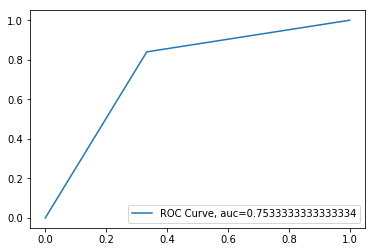

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


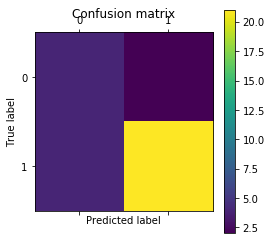



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



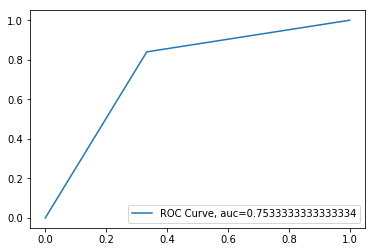

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


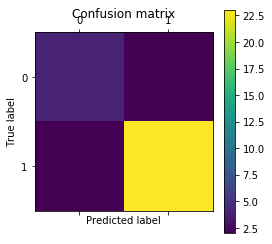



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



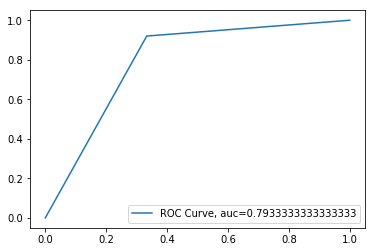

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


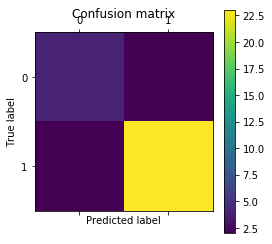



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



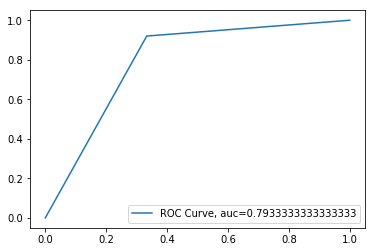

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


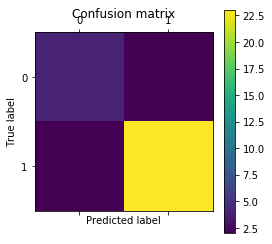



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



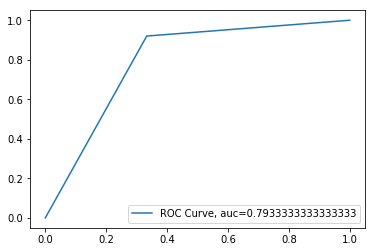

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


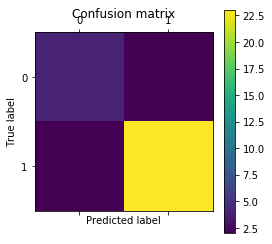



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



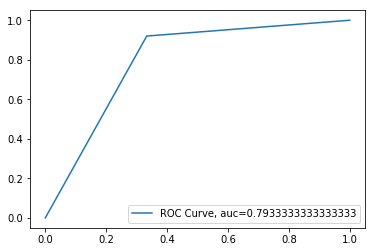

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


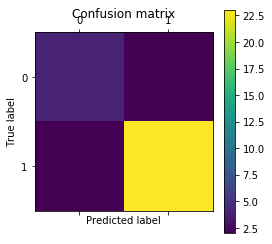



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



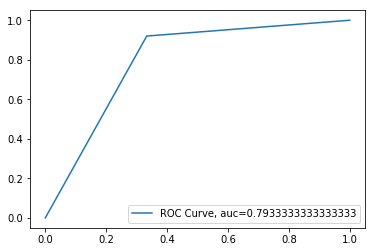

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


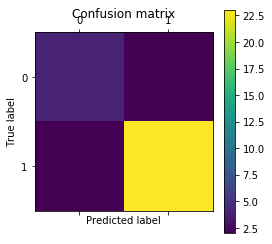



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



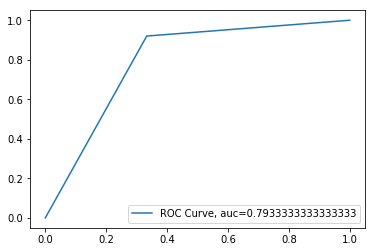

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


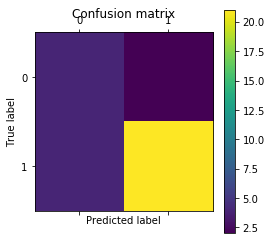



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



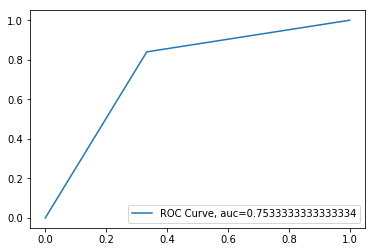

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


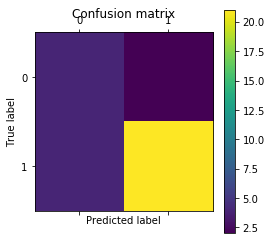



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



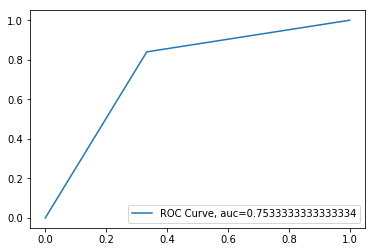

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


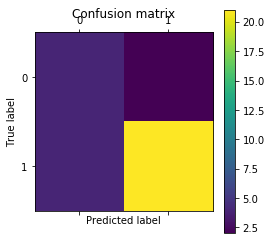



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



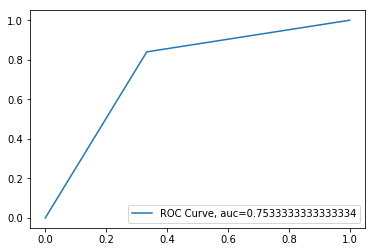

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


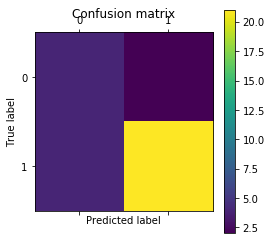



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



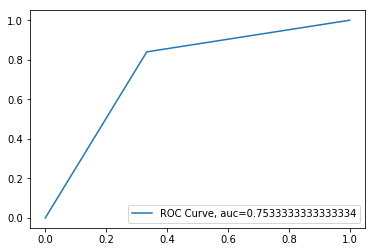

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


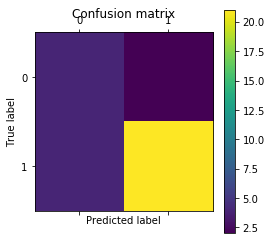



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



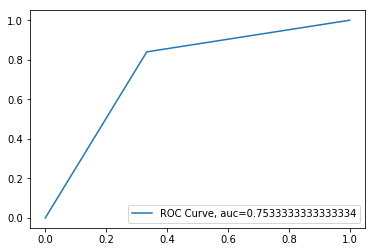

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


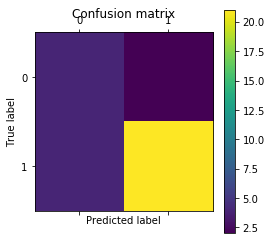



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



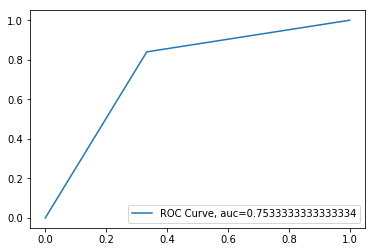

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


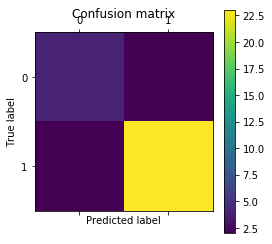



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



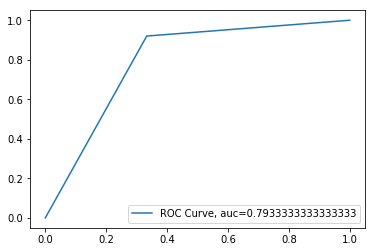

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


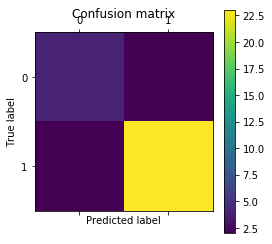



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



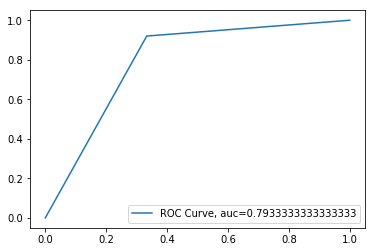

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


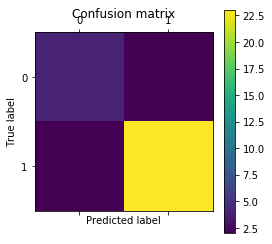



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



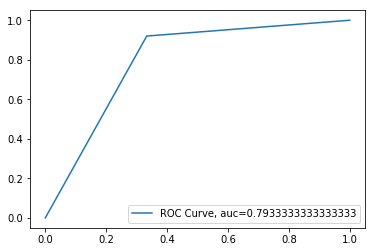

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


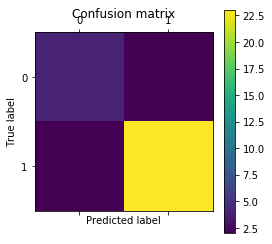



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



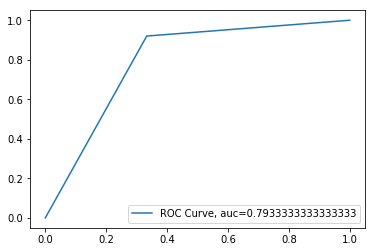

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


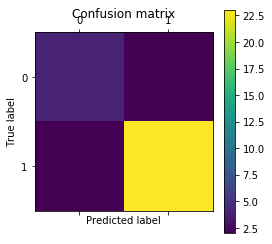



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



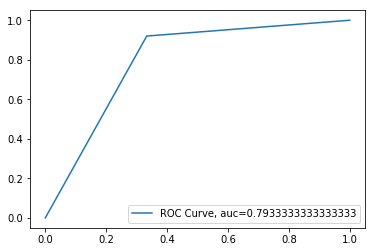

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


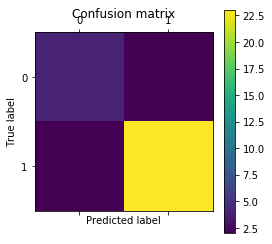



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



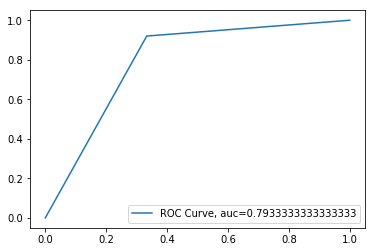

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


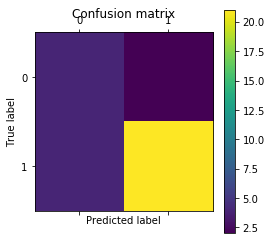



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



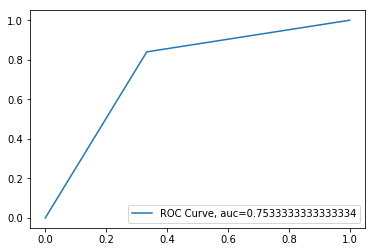

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


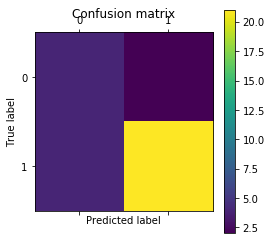



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



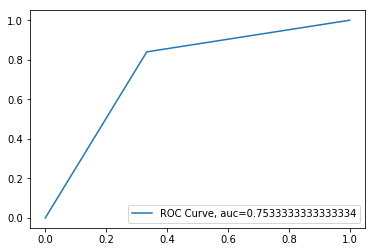

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


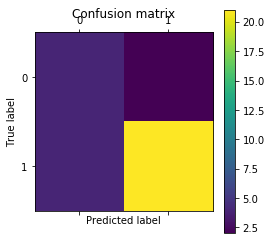



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



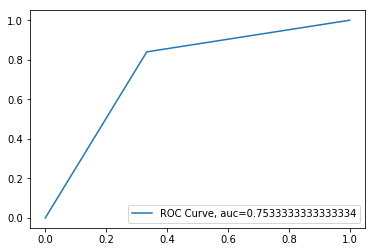

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


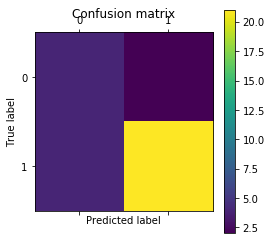



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



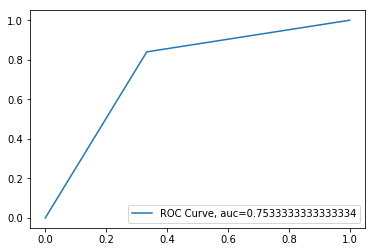

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


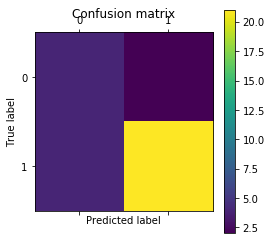



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



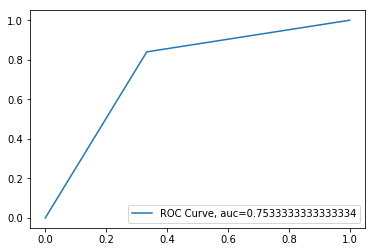

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


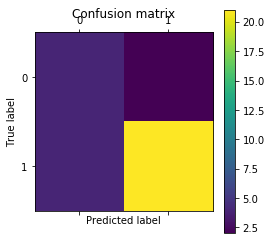



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



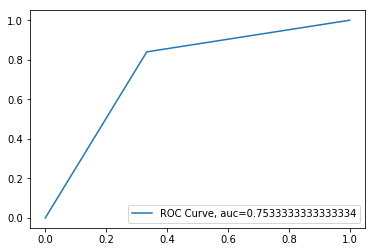

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


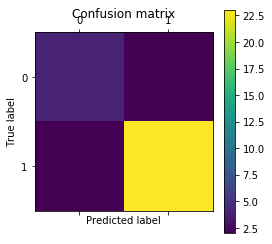



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



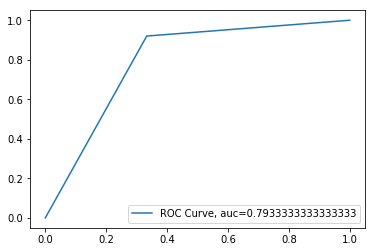

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


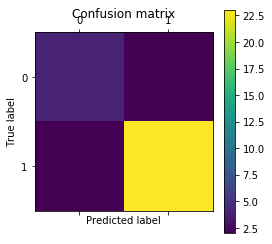



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



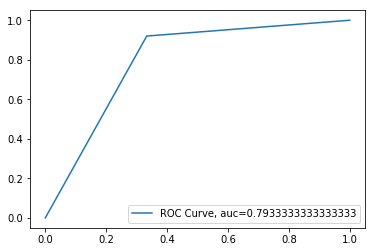

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


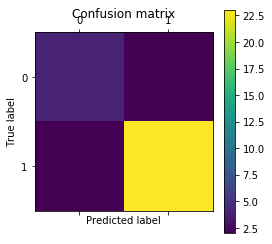



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



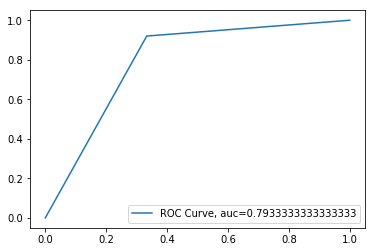

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


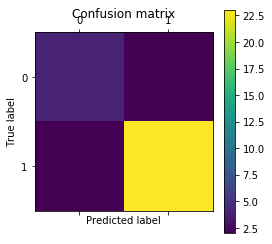



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



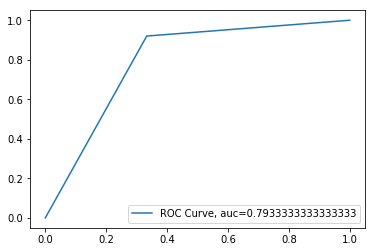

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


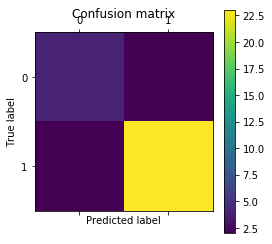



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



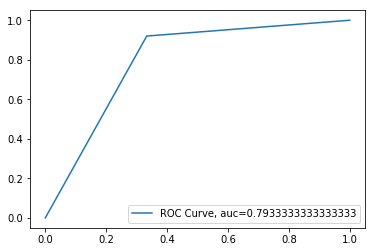

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


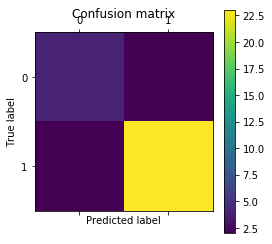



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



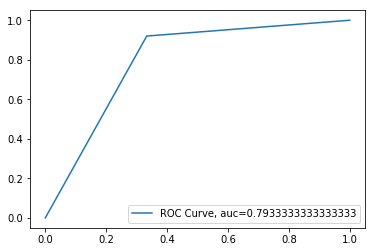

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


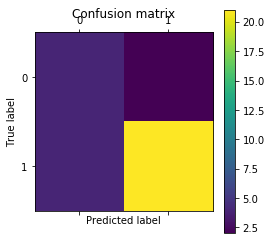



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



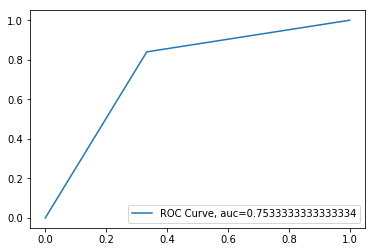

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


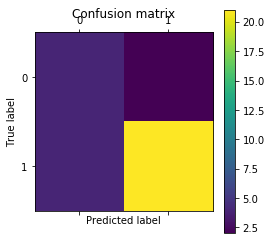



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



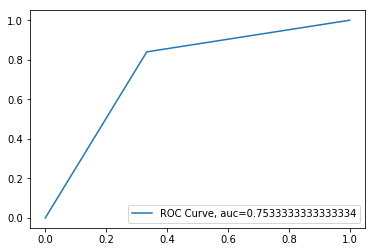

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


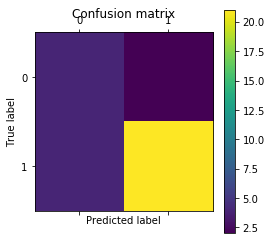



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



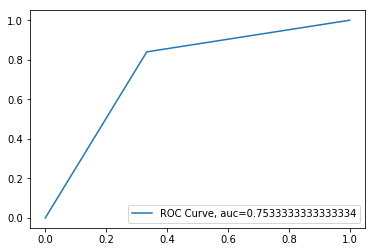

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


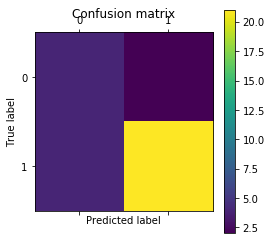



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



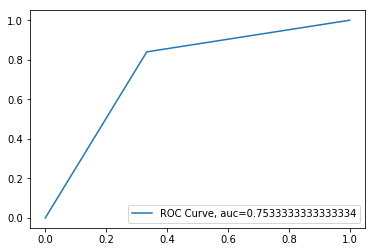

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


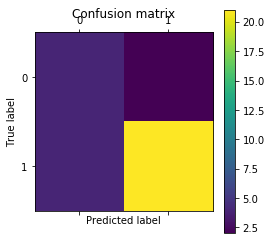



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



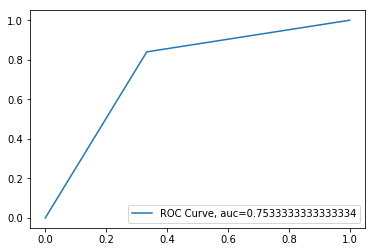

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


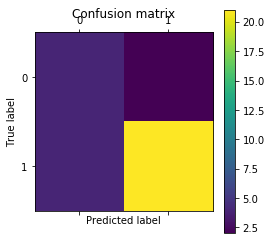



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



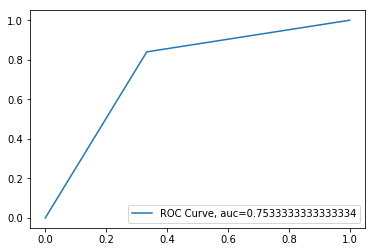

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


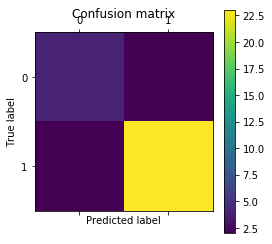



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



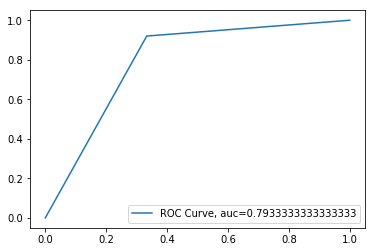

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


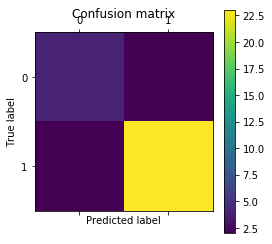



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



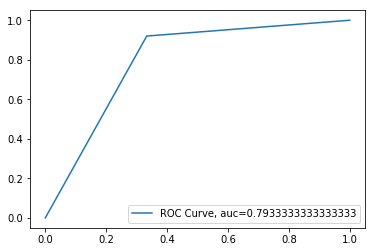

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


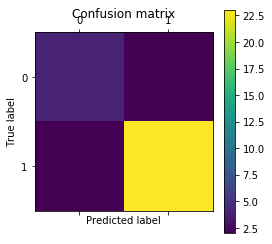



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



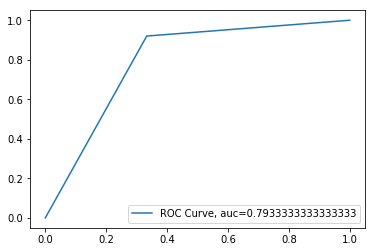

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


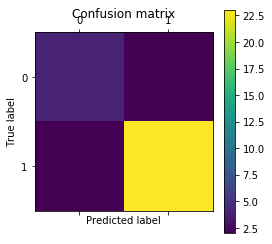



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



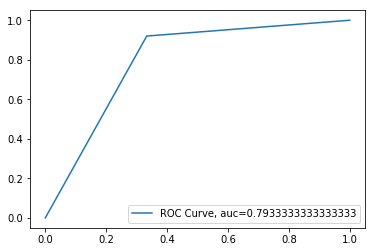

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


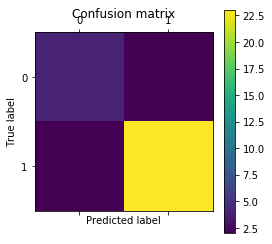



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



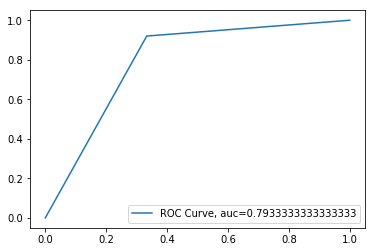

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


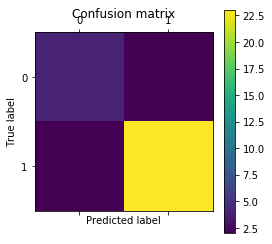



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



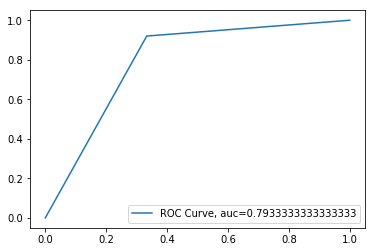

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


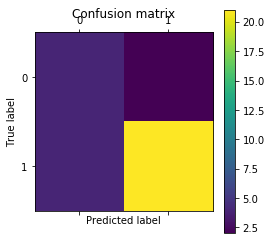



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



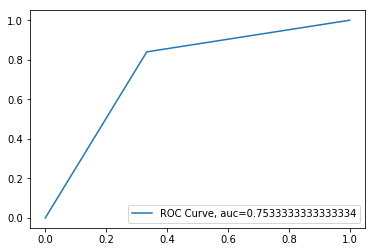

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


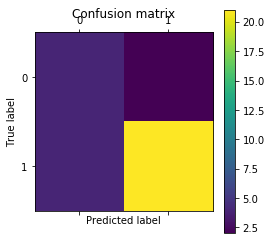



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



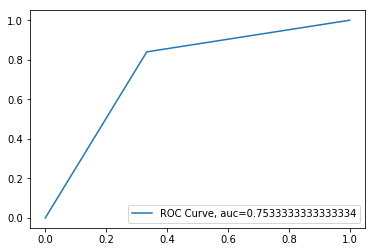

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


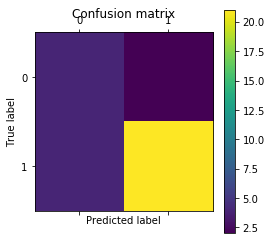



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



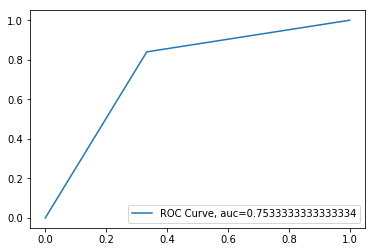

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


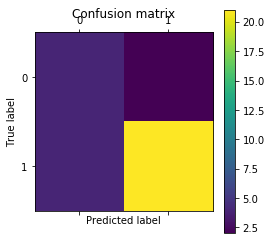



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



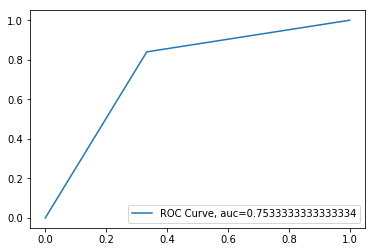

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


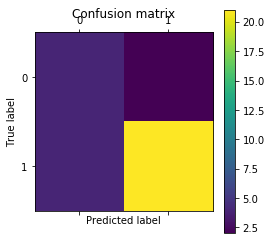



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



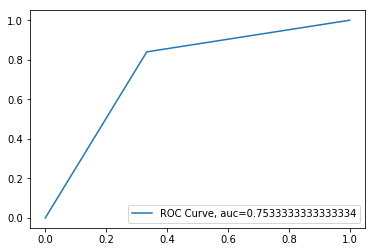

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


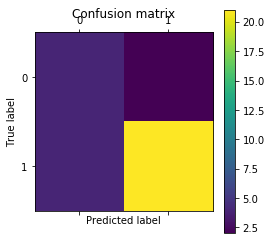



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



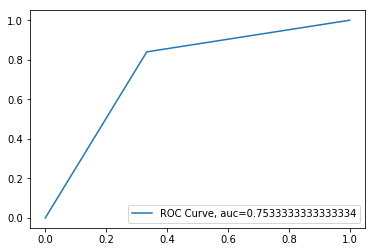

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


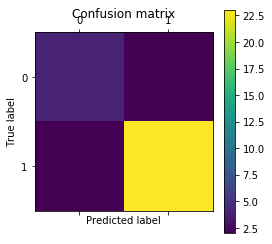



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



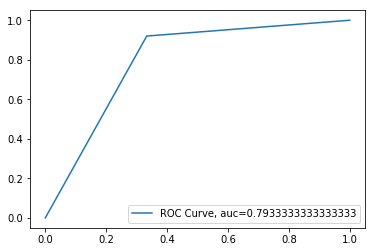

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


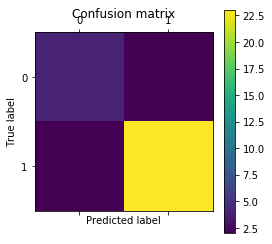



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



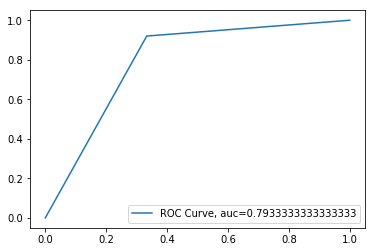

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


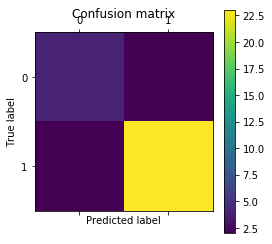



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



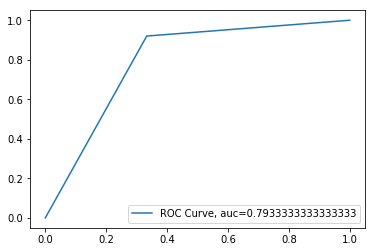

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


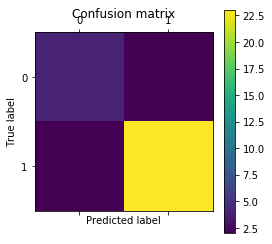



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



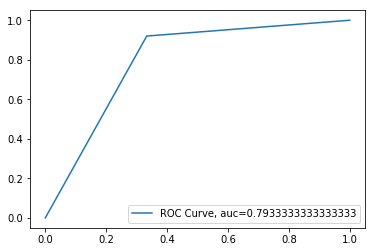

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


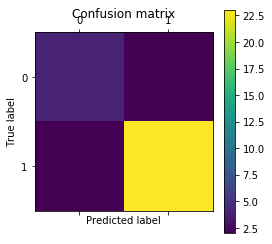



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



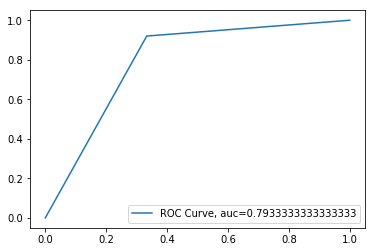

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


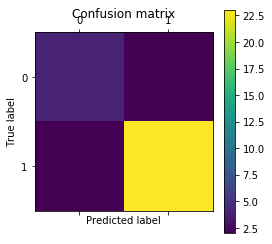



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



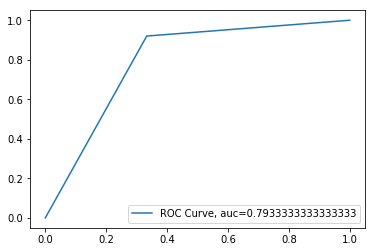

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


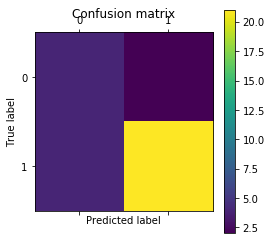



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



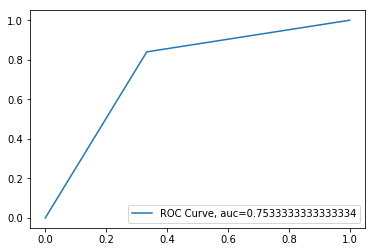

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


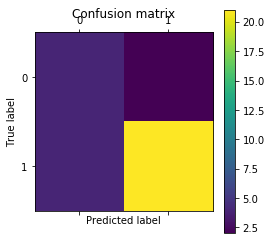



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



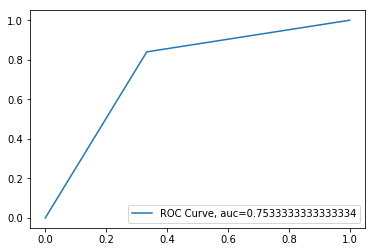

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


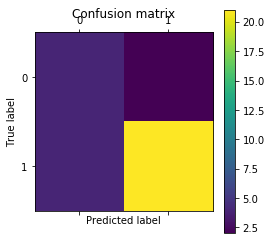



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



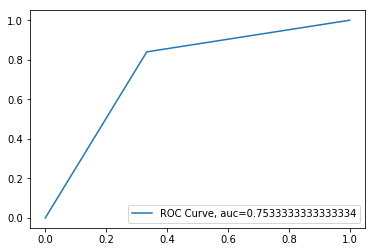

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


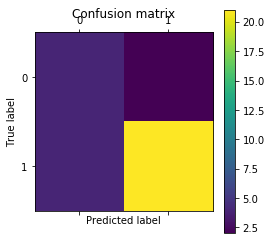



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



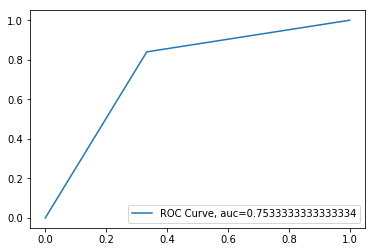

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


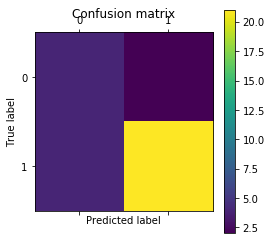



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



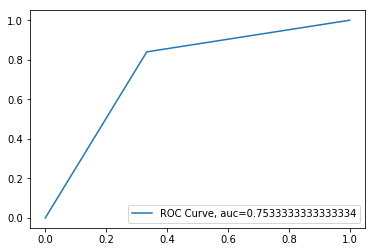

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


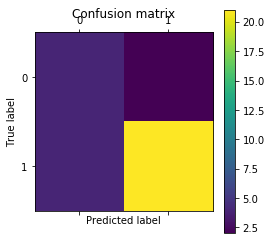



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



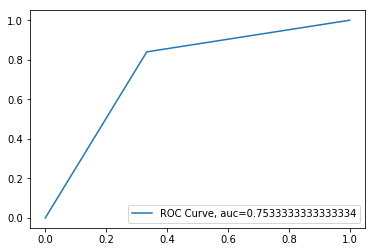

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


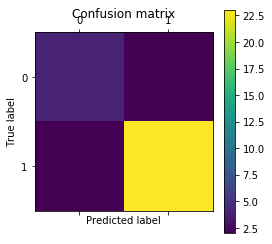



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



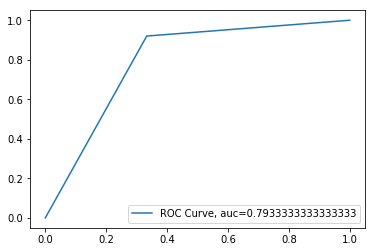

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


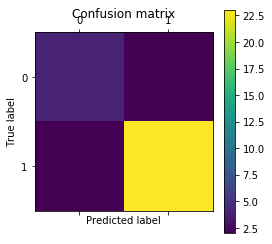



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



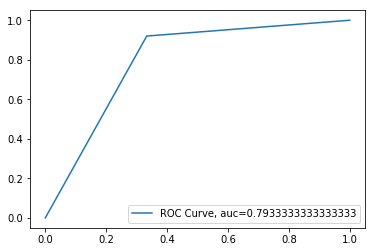

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


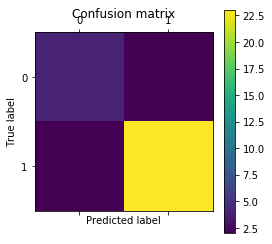



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



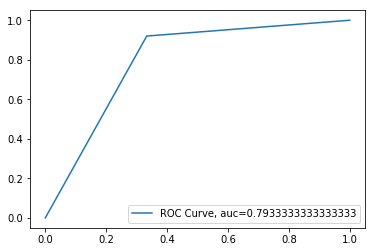

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


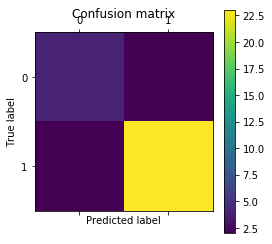



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



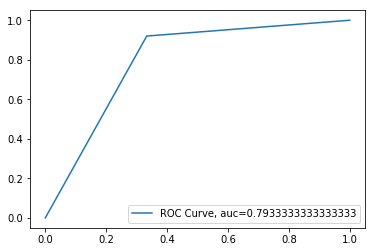

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


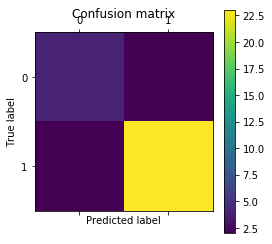



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



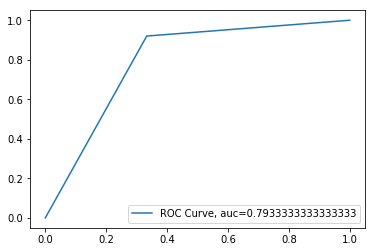

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


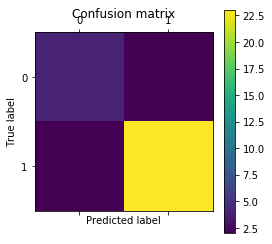



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



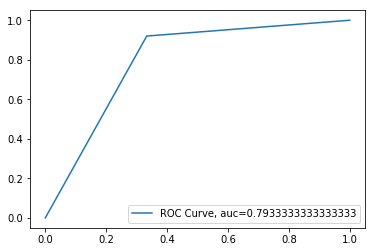

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


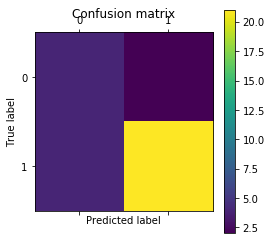



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



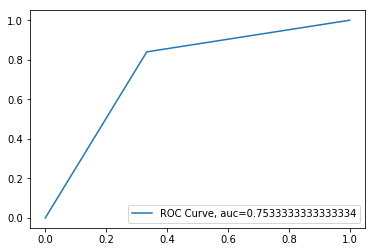

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


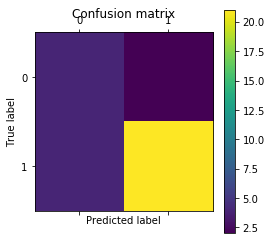



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



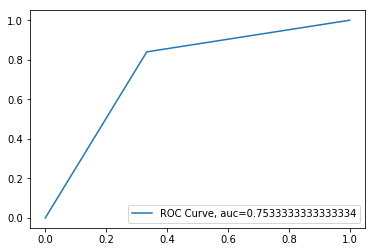

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


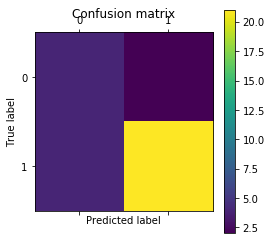



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



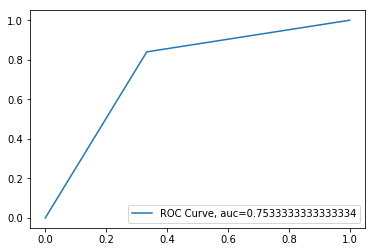

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


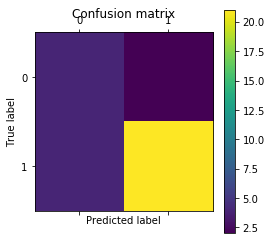



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



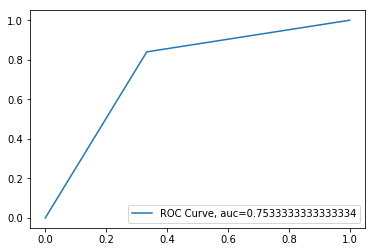

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


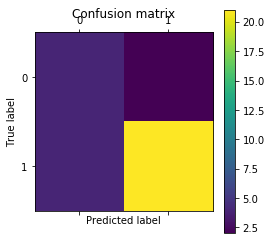



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



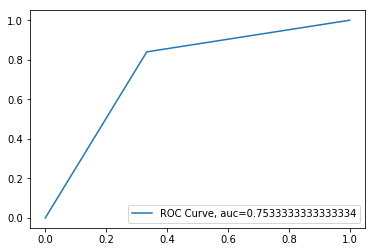

Accuracy: 0.8064516129032258
[[ 4  2]
 [ 4 21]]


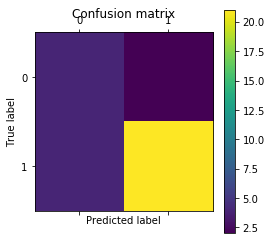



              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.84      0.87        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.83      0.81      0.82        31



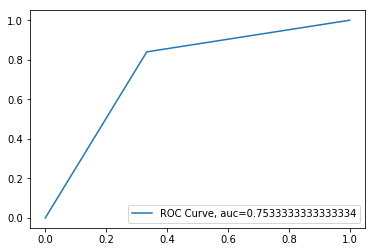

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


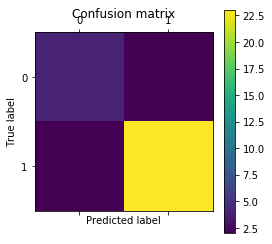



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



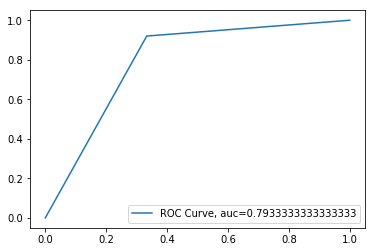

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


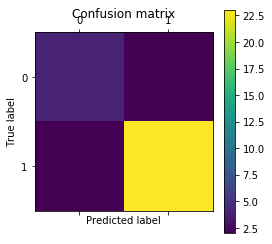



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



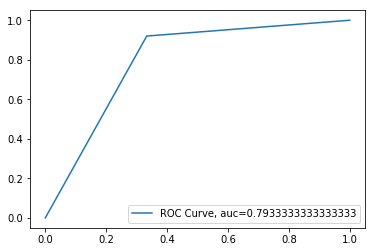

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


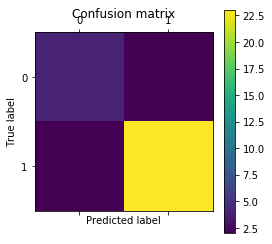



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



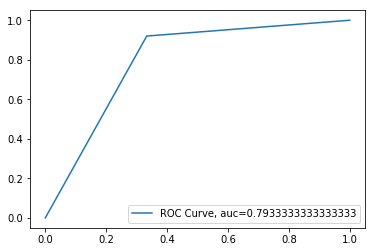

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


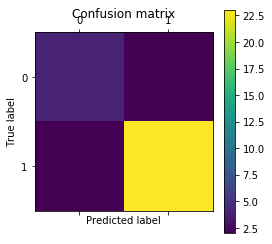



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



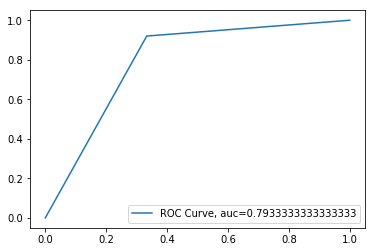

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


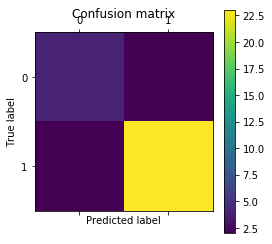



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



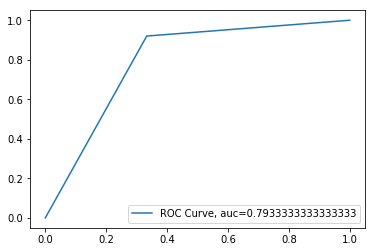

Accuracy: 0.8709677419354839
[[ 4  2]
 [ 2 23]]


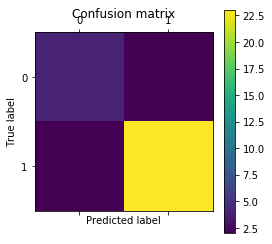



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.92      0.92      0.92        25

   micro avg       0.87      0.87      0.87        31
   macro avg       0.79      0.79      0.79        31
weighted avg       0.87      0.87      0.87        31



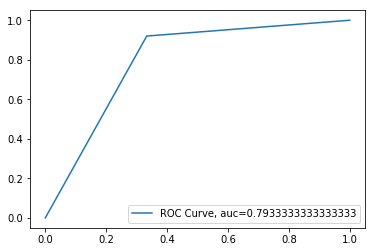

In [32]:
c = [1,  2,  3,  4,  5,  6,  7,  8,  9, 10]
state = [1, 5, 10, 15,20,42]
weight = ['balanced', None]
for i in c:
    for j in weight:
        for k in state:
                classifier = LogisticRegression(C =i,random_state=k ,class_weight=j)  
                classifier.fit(hp_xtrn, hp_ytrain)
                y_pre = classifier.predict(hp_xtst)
                print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pre))
                cm = confusion_matrix(hp_ytest, y_pre)
                print(cm)
                plt.matshow(cm)
                plt.title('Confusion matrix')
                plt.colorbar()
                plt.ylabel('True label')
                plt.xlabel('Predicted label')
                plt.show()
                print('\n')
                print(classification_report(hp_ytest, y_pre))

                fpr, tpr, thresholds = roc_curve(hp_ytest, y_pre)
                auc = roc_auc_score(hp_ytest, y_pre)
                plt.plot(fpr,tpr,label="ROC Curve, auc="+str(auc))
                plt.legend(loc=4)
                plt.show()

# SMOTE (to handle imbalance data)

In [25]:

print("Before OverSampling, counts of label '1': {}".format(sum(hp_ytrain['class']== 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(hp_ytrain['class']== 0)))

Before OverSampling, counts of label '1': 97
Before OverSampling, counts of label '0': 27 



In [26]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(random_state = 2)
hp_xtrain_sm, ht_ytrain_sm = sm.fit_sample(hp_xtrn, hp_ytrain)


In [27]:
print('After OverSampling, the shape of train_X: {}'.format(hp_xtrain_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(ht_ytrain_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(ht_ytrain_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(ht_ytrain_sm==0)))

After OverSampling, the shape of train_X: (194, 19)
After OverSampling, the shape of train_y: (194,) 

After OverSampling, counts of label '1': 97
After OverSampling, counts of label '0': 97


In [28]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': np.linspace(1, 10, 10),
    'class_weight':['balanced', None],
    'random_state':np.linspace(1, 15, 15,dtype=int)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5)
clf.fit(hp_xtrain_sm, ht_ytrain_sm)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] C=1.0, class_weight=balanced, random_state=1 ....................
[CV]  C=1.0, class_weight=balanced, random_state=1, score=0.775, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=1 ....................
[CV]  C=1.0, class_weight=balanced, random_state=1, score=0.825, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=1 ....................
[CV]  C=1.0, class_weight=balanced, random_state=1, score=0.8157894736842105, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=1 ....................
[CV]  C=1.0, class_weight=balanced, random_state=1, score=0.9210526315789473, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=1 ....................
[CV]  C=1.0, class_weight=balanced, random_state=1, score=0.9210526315789473, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=2 ....................
[CV]  C=1.0, class_weight=balanced, random_state=2, score=0.775, total=   0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1.0, class_weight=balanced, random_state=12, score=0.9210526315789473, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=12 ...................
[CV]  C=1.0, class_weight=balanced, random_state=12, score=0.9210526315789473, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=13 ...................
[CV]  C=1.0, class_weight=balanced, random_state=13, score=0.775, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=13 ...................
[CV]  C=1.0, class_weight=balanced, random_state=13, score=0.825, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=13 ...................
[CV]  C=1.0, class_weight=balanced, random_state=13, score=0.8157894736842105, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=13 ...................
[CV]  C=1.0, class_weight=balanced, random_state=13, score=0.9210526315789473, total=   0.0s
[CV] C=1.0, class_weight=balanced, random_state=13 ...................
[CV]  C=1.0, class_weight=balanced, random

[CV]  C=1.0, class_weight=None, random_state=10, score=0.9210526315789473, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=11 .......................
[CV]  C=1.0, class_weight=None, random_state=11, score=0.775, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=11 .......................
[CV]  C=1.0, class_weight=None, random_state=11, score=0.825, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=11 .......................
[CV]  C=1.0, class_weight=None, random_state=11, score=0.8157894736842105, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=11 .......................
[CV]  C=1.0, class_weight=None, random_state=11, score=0.9210526315789473, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=11 .......................
[CV]  C=1.0, class_weight=None, random_state=11, score=0.9210526315789473, total=   0.0s
[CV] C=1.0, class_weight=None, random_state=12 .......................
[CV]  C=1.0, class_weight=None, random_state=12, score=0.775, tota

[CV]  C=2.0, class_weight=balanced, random_state=10, score=0.825, total=   0.0s
[CV] C=2.0, class_weight=balanced, random_state=10 ...................
[CV]  C=2.0, class_weight=balanced, random_state=10, score=0.868421052631579, total=   0.0s
[CV] C=2.0, class_weight=balanced, random_state=10 ...................
[CV]  C=2.0, class_weight=balanced, random_state=10, score=0.9210526315789473, total=   0.0s
[CV] C=2.0, class_weight=balanced, random_state=10 ...................
[CV]  C=2.0, class_weight=balanced, random_state=10, score=0.8947368421052632, total=   0.0s
[CV] C=2.0, class_weight=balanced, random_state=11 ...................
[CV]  C=2.0, class_weight=balanced, random_state=11, score=0.8, total=   0.0s
[CV] C=2.0, class_weight=balanced, random_state=11 ...................
[CV]  C=2.0, class_weight=balanced, random_state=11, score=0.825, total=   0.0s
[CV] C=2.0, class_weight=balanced, random_state=11 ...................
[CV]  C=2.0, class_weight=balanced, random_state=11, score

[CV]  C=2.0, class_weight=None, random_state=10, score=0.8, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=10 .......................
[CV]  C=2.0, class_weight=None, random_state=10, score=0.825, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=10 .......................
[CV]  C=2.0, class_weight=None, random_state=10, score=0.868421052631579, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=10 .......................
[CV]  C=2.0, class_weight=None, random_state=10, score=0.9210526315789473, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=10 .......................
[CV]  C=2.0, class_weight=None, random_state=10, score=0.8947368421052632, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=11 .......................
[CV]  C=2.0, class_weight=None, random_state=11, score=0.8, total=   0.0s
[CV] C=2.0, class_weight=None, random_state=11 .......................
[CV]  C=2.0, class_weight=None, random_state=11, score=0.825, total=   0.0s
[CV] C=2

[CV]  C=3.0, class_weight=balanced, random_state=9, score=0.8, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=9 ....................
[CV]  C=3.0, class_weight=balanced, random_state=9, score=0.825, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=9 ....................
[CV]  C=3.0, class_weight=balanced, random_state=9, score=0.868421052631579, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=9 ....................
[CV]  C=3.0, class_weight=balanced, random_state=9, score=0.9210526315789473, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=9 ....................
[CV]  C=3.0, class_weight=balanced, random_state=9, score=0.8947368421052632, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=10 ...................
[CV]  C=3.0, class_weight=balanced, random_state=10, score=0.8, total=   0.0s
[CV] C=3.0, class_weight=balanced, random_state=10 ...................
[CV]  C=3.0, class_weight=balanced, random_state=10, score=0.825,

[CV]  C=3.0, class_weight=None, random_state=8, score=0.8, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=8 ........................
[CV]  C=3.0, class_weight=None, random_state=8, score=0.825, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=8 ........................
[CV]  C=3.0, class_weight=None, random_state=8, score=0.868421052631579, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=8 ........................
[CV]  C=3.0, class_weight=None, random_state=8, score=0.9210526315789473, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=8 ........................
[CV]  C=3.0, class_weight=None, random_state=8, score=0.8947368421052632, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=9 ........................
[CV]  C=3.0, class_weight=None, random_state=9, score=0.8, total=   0.0s
[CV] C=3.0, class_weight=None, random_state=9 ........................
[CV]  C=3.0, class_weight=None, random_state=9, score=0.825, total=   0.0s
[CV] C=3.0, cla

[CV]  C=4.0, class_weight=balanced, random_state=6, score=0.8, total=   0.0s
[CV] C=4.0, class_weight=balanced, random_state=6 ....................
[CV]  C=4.0, class_weight=balanced, random_state=6, score=0.825, total=   0.0s
[CV] C=4.0, class_weight=balanced, random_state=6 ....................
[CV]  C=4.0, class_weight=balanced, random_state=6, score=0.868421052631579, total=   0.0s
[CV] C=4.0, class_weight=balanced, random_state=6 ....................
[CV]  C=4.0, class_weight=balanced, random_state=6, score=0.9210526315789473, total=   0.0s
[CV] C=4.0, class_weight=balanced, random_state=6 ....................
[CV]  C=4.0, class_weight=balanced, random_state=6, score=0.8947368421052632, total=   0.0s
[CV] C=4.0, class_weight=balanced, random_state=7 ....................
[CV]  C=4.0, class_weight=balanced, random_state=7, score=0.8, total=   0.0s
[CV] C=4.0, class_weight=balanced, random_state=7 ....................
[CV]  C=4.0, class_weight=balanced, random_state=7, score=0.825, t

[CV]  C=4.0, class_weight=None, random_state=6, score=0.8, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=6 ........................
[CV]  C=4.0, class_weight=None, random_state=6, score=0.825, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=6 ........................
[CV]  C=4.0, class_weight=None, random_state=6, score=0.868421052631579, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=6 ........................
[CV]  C=4.0, class_weight=None, random_state=6, score=0.9210526315789473, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=6 ........................
[CV]  C=4.0, class_weight=None, random_state=6, score=0.8947368421052632, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=7 ........................
[CV]  C=4.0, class_weight=None, random_state=7, score=0.8, total=   0.0s
[CV] C=4.0, class_weight=None, random_state=7 ........................
[CV]  C=4.0, class_weight=None, random_state=7, score=0.825, total=   0.0s
[CV] C=4.0, cla

[CV]  C=5.0, class_weight=balanced, random_state=5, score=0.8947368421052632, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=6 ....................
[CV]  C=5.0, class_weight=balanced, random_state=6, score=0.8, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=6 ....................
[CV]  C=5.0, class_weight=balanced, random_state=6, score=0.825, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=6 ....................
[CV]  C=5.0, class_weight=balanced, random_state=6, score=0.868421052631579, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=6 ....................
[CV]  C=5.0, class_weight=balanced, random_state=6, score=0.9210526315789473, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=6 ....................
[CV]  C=5.0, class_weight=balanced, random_state=6, score=0.8947368421052632, total=   0.0s
[CV] C=5.0, class_weight=balanced, random_state=7 ....................
[CV]  C=5.0, class_weight=balanced, random_state=7,

[CV]  C=5.0, class_weight=None, random_state=4, score=0.825, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=4 ........................
[CV]  C=5.0, class_weight=None, random_state=4, score=0.868421052631579, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=4 ........................
[CV]  C=5.0, class_weight=None, random_state=4, score=0.9210526315789473, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=4 ........................
[CV]  C=5.0, class_weight=None, random_state=4, score=0.8947368421052632, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=5 ........................
[CV]  C=5.0, class_weight=None, random_state=5, score=0.8, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=5 ........................
[CV]  C=5.0, class_weight=None, random_state=5, score=0.825, total=   0.0s
[CV] C=5.0, class_weight=None, random_state=5 ........................
[CV]  C=5.0, class_weight=None, random_state=5, score=0.868421052631579, total=   0.0s
[

[CV]  C=6.0, class_weight=balanced, random_state=4, score=0.825, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=4 ....................
[CV]  C=6.0, class_weight=balanced, random_state=4, score=0.868421052631579, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=4 ....................
[CV]  C=6.0, class_weight=balanced, random_state=4, score=0.9210526315789473, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=4 ....................
[CV]  C=6.0, class_weight=balanced, random_state=4, score=0.8947368421052632, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=5 ....................
[CV]  C=6.0, class_weight=balanced, random_state=5, score=0.8, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=5 ....................
[CV]  C=6.0, class_weight=balanced, random_state=5, score=0.825, total=   0.0s
[CV] C=6.0, class_weight=balanced, random_state=5 ....................
[CV]  C=6.0, class_weight=balanced, random_state=5, score=0.8684

[CV]  C=6.0, class_weight=None, random_state=11, score=0.825, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=11 .......................
[CV]  C=6.0, class_weight=None, random_state=11, score=0.868421052631579, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=11 .......................
[CV]  C=6.0, class_weight=None, random_state=11, score=0.9210526315789473, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=11 .......................
[CV]  C=6.0, class_weight=None, random_state=11, score=0.8947368421052632, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=12 .......................
[CV]  C=6.0, class_weight=None, random_state=12, score=0.8, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=12 .......................
[CV]  C=6.0, class_weight=None, random_state=12, score=0.825, total=   0.0s
[CV] C=6.0, class_weight=None, random_state=12 .......................
[CV]  C=6.0, class_weight=None, random_state=12, score=0.868421052631579, total=  

[CV]  C=7.0, class_weight=balanced, random_state=9, score=0.8947368421052632, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=10 ...................
[CV]  C=7.0, class_weight=balanced, random_state=10, score=0.8, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=10 ...................
[CV]  C=7.0, class_weight=balanced, random_state=10, score=0.825, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=10 ...................
[CV]  C=7.0, class_weight=balanced, random_state=10, score=0.868421052631579, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=10 ...................
[CV]  C=7.0, class_weight=balanced, random_state=10, score=0.9210526315789473, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=10 ...................
[CV]  C=7.0, class_weight=balanced, random_state=10, score=0.8947368421052632, total=   0.0s
[CV] C=7.0, class_weight=balanced, random_state=11 ...................
[CV]  C=7.0, class_weight=balanced, random_sta

[CV]  C=7.0, class_weight=None, random_state=9, score=0.825, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=9 ........................
[CV]  C=7.0, class_weight=None, random_state=9, score=0.868421052631579, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=9 ........................
[CV]  C=7.0, class_weight=None, random_state=9, score=0.9210526315789473, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=9 ........................
[CV]  C=7.0, class_weight=None, random_state=9, score=0.8947368421052632, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=10 .......................
[CV]  C=7.0, class_weight=None, random_state=10, score=0.8, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=10 .......................
[CV]  C=7.0, class_weight=None, random_state=10, score=0.825, total=   0.0s
[CV] C=7.0, class_weight=None, random_state=10 .......................
[CV]  C=7.0, class_weight=None, random_state=10, score=0.868421052631579, total=   0.0

[CV]  C=8.0, class_weight=balanced, random_state=7, score=0.8947368421052632, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=8 ....................
[CV]  C=8.0, class_weight=balanced, random_state=8, score=0.8, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=8 ....................
[CV]  C=8.0, class_weight=balanced, random_state=8, score=0.825, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=8 ....................
[CV]  C=8.0, class_weight=balanced, random_state=8, score=0.868421052631579, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=8 ....................
[CV]  C=8.0, class_weight=balanced, random_state=8, score=0.9210526315789473, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=8 ....................
[CV]  C=8.0, class_weight=balanced, random_state=8, score=0.8947368421052632, total=   0.0s
[CV] C=8.0, class_weight=balanced, random_state=9 ....................
[CV]  C=8.0, class_weight=balanced, random_state=9,

[CV]  C=8.0, class_weight=None, random_state=6, score=0.825, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=6 ........................
[CV]  C=8.0, class_weight=None, random_state=6, score=0.868421052631579, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=6 ........................
[CV]  C=8.0, class_weight=None, random_state=6, score=0.9210526315789473, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=6 ........................
[CV]  C=8.0, class_weight=None, random_state=6, score=0.8947368421052632, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=7 ........................
[CV]  C=8.0, class_weight=None, random_state=7, score=0.8, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=7 ........................
[CV]  C=8.0, class_weight=None, random_state=7, score=0.825, total=   0.0s
[CV] C=8.0, class_weight=None, random_state=7 ........................
[CV]  C=8.0, class_weight=None, random_state=7, score=0.868421052631579, total=   0.0s
[

[CV]  C=9.0, class_weight=balanced, random_state=4, score=0.868421052631579, total=   0.0s
[CV] C=9.0, class_weight=balanced, random_state=4 ....................
[CV]  C=9.0, class_weight=balanced, random_state=4, score=0.9210526315789473, total=   0.0s
[CV] C=9.0, class_weight=balanced, random_state=4 ....................
[CV]  C=9.0, class_weight=balanced, random_state=4, score=0.8947368421052632, total=   0.0s
[CV] C=9.0, class_weight=balanced, random_state=5 ....................
[CV]  C=9.0, class_weight=balanced, random_state=5, score=0.8, total=   0.0s
[CV] C=9.0, class_weight=balanced, random_state=5 ....................
[CV]  C=9.0, class_weight=balanced, random_state=5, score=0.825, total=   0.0s
[CV] C=9.0, class_weight=balanced, random_state=5 ....................
[CV]  C=9.0, class_weight=balanced, random_state=5, score=0.868421052631579, total=   0.0s
[CV] C=9.0, class_weight=balanced, random_state=5 ....................
[CV]  C=9.0, class_weight=balanced, random_state=5, 

[CV]  C=9.0, class_weight=None, random_state=2, score=0.8, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=2 ........................
[CV]  C=9.0, class_weight=None, random_state=2, score=0.825, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=2 ........................
[CV]  C=9.0, class_weight=None, random_state=2, score=0.868421052631579, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=2 ........................
[CV]  C=9.0, class_weight=None, random_state=2, score=0.9210526315789473, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=2 ........................
[CV]  C=9.0, class_weight=None, random_state=2, score=0.8947368421052632, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=3 ........................
[CV]  C=9.0, class_weight=None, random_state=3, score=0.8, total=   0.0s
[CV] C=9.0, class_weight=None, random_state=3 ........................
[CV]  C=9.0, class_weight=None, random_state=3, score=0.825, total=   0.0s
[CV] C=9.0, cla

[CV]  C=9.0, class_weight=None, random_state=15, score=0.8947368421052632, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=1 ...................
[CV]  C=10.0, class_weight=balanced, random_state=1, score=0.8, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=1 ...................
[CV]  C=10.0, class_weight=balanced, random_state=1, score=0.825, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=1 ...................
[CV]  C=10.0, class_weight=balanced, random_state=1, score=0.868421052631579, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=1 ...................
[CV]  C=10.0, class_weight=balanced, random_state=1, score=0.9210526315789473, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=1 ...................
[CV]  C=10.0, class_weight=balanced, random_state=1, score=0.8947368421052632, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=2 ...................
[CV]  C=10.0, class_weight=balanced, random_state

[CV]  C=10.0, class_weight=balanced, random_state=11, score=0.868421052631579, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=11 ..................
[CV]  C=10.0, class_weight=balanced, random_state=11, score=0.9210526315789473, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=11 ..................
[CV]  C=10.0, class_weight=balanced, random_state=11, score=0.8947368421052632, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=12 ..................
[CV]  C=10.0, class_weight=balanced, random_state=12, score=0.8, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=12 ..................
[CV]  C=10.0, class_weight=balanced, random_state=12, score=0.825, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=12 ..................
[CV]  C=10.0, class_weight=balanced, random_state=12, score=0.868421052631579, total=   0.0s
[CV] C=10.0, class_weight=balanced, random_state=12 ..................
[CV]  C=10.0, class_weight=balanced, ran

[CV]  C=10.0, class_weight=None, random_state=10, score=0.868421052631579, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=10 ......................
[CV]  C=10.0, class_weight=None, random_state=10, score=0.9210526315789473, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=10 ......................
[CV]  C=10.0, class_weight=None, random_state=10, score=0.8947368421052632, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=11 ......................
[CV]  C=10.0, class_weight=None, random_state=11, score=0.8, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=11 ......................
[CV]  C=10.0, class_weight=None, random_state=11, score=0.825, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=11 ......................
[CV]  C=10.0, class_weight=None, random_state=11, score=0.868421052631579, total=   0.0s
[CV] C=10.0, class_weight=None, random_state=11 ......................
[CV]  C=10.0, class_weight=None, random_state=11, score=0.921052

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    4.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 'class_weight': ['balanced', None], 'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [29]:
clf.best_params_

{'C': 2.0, 'class_weight': 'balanced', 'random_state': 1}

In [30]:
lr1 = LogisticRegression(C=2,class_weight='balanced', random_state=1,verbose=5)
lr1.fit(hp_xtrain_sm, ht_ytrain_sm)

[LibLinear]

LogisticRegression(C=2, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
          solver='warn', tol=0.0001, verbose=5, warm_start=False)

In [39]:
y_pre = lr1.predict(hp_xtst)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pre))
print(confusion_matrix(hp_ytest, y_pre))  
print(classification_report(hp_ytest, y_pre))
print(metrics.recall_score(hp_ytest, y_pre,average='weighted'))


Accuracy: 0.8387096774193549
[[ 5  0]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.81      0.89        26

   micro avg       0.84      0.84      0.84        31
   macro avg       0.75      0.90      0.78        31
weighted avg       0.92      0.84      0.86        31

0.8387096774193549


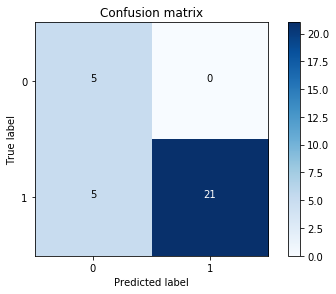

In [40]:
y_pre = lr1.predict(hp_xtst)

cnf_matrix_tra = confusion_matrix(hp_ytest, y_pre)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

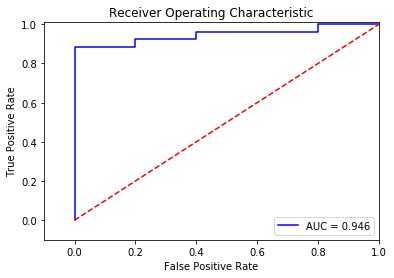

In [41]:
y_pred_sample_score = lr1.decision_function(hp_xtst)


fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# StratifiedShuffleSplit

In [16]:
classifiers = {'Logistic Regression: ':LogisticRegression(),'Logistic Regression C = 1 :':LogisticRegression(C = 5), 'Logistic Regression (balanced):':LogisticRegression(class_weight = 'balanced'), 'Logistic Regression Random_State = 5:':LogisticRegression(random_state = 5), 'Logistic Regression C = 5:':LogisticRegression(C = 5)}

In [17]:
log_cols = ["Classifier", "Accuracy","Precision","Recall","ROC Score","F1-Score", "CV_Score"]
log = pd.DataFrame(columns=log_cols)
sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state =5)
sss.get_n_splits(train_data, test_data)
for Name,classify in classifiers.items():
    for train_index, test_index in sss.split(train_data, test_data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = train_data.iloc[train_index], train_data.iloc[test_index]
        y,y_test = test_data.iloc[train_index], test_data.iloc[test_index]
               
        cls = classify
        cls.fit(X, y)
        scores = cross_val_score(cls,X, y, cv=10)
        cv_score = max(scores)
        y_out = cls.predict(X_test)
        accuracy = metrics.accuracy_score(y_test,y_out)
        precision = metrics.precision_score(y_test,y_out,average='weighted')
        recall = metrics.recall_score(y_test,y_out,average='weighted')
        roc_auc = roc_auc_score(y_test,y_out)
        f1_score = metrics.f1_score(y_test,y_out,average='weighted')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,roc_auc,f1_score,cv_score]], columns=log_cols)
        log = log.append(log_entry)

In [18]:
log

,Classifier,Accuracy,Precision,Recall,ROC Score,F1-Score,CV_Score
0,Logistic Regression:,0.870968,0.862007,0.870968,0.730000,0.860546,0.923077
0,Logistic Regression:,0.870968,0.870968,0.870968,0.793333,0.870968,1.000000
0,Logistic Regression:,0.967742,0.972350,0.967742,0.980000,0.968653,1.000000
0,Logistic Regression:,0.741935,0.741935,0.741935,0.586667,0.741935,1.000000
0,Logistic Regression:,0.903226,0.913594,0.903226,0.750000,0.889836,0.923077
0,Logistic Regression C = 1 :,0.870968,0.862007,0.870968,0.730000,0.860546,0.923077
0,Logistic Regression C = 1 :,0.903226,0.911098,0.903226,0.876667,0.905960,1.000000
0,Logistic Regression C = 1 :,0.967742,0.972350,0.967742,0.980000,0.968653,1.000000
0,Logistic Regression C = 1 :,0.774194,0.788594,0.774194,0.670000,0.780574,1.000000
0,Logistic Regression C = 1 :,0.903226,0.913594,0.903226,0.750000,0.889836,0.923077


# ShuffleSplit

In [19]:
ss = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 2)
ss.get_n_splits(train_data, test_data)
log_ss = pd.DataFrame(columns=log_cols)
for Name,classify in classifiers.items():
    for train_index, test_index in ss.split(train_data, test_data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = train_data.iloc[train_index], train_data.iloc[test_index]
        y,y_test = test_data.iloc[train_index], test_data.iloc[test_index]
               
        cls = classify
        cls.fit(X, y)
        scores = cross_val_score(cls,X, y, cv=10)
        cv_score = max(scores)
        y_out = cls.predict(X_test)
        accuracy = metrics.accuracy_score(y_test,y_out)
        precision = metrics.precision_score(y_test,y_out,average='weighted')
        recall = metrics.recall_score(y_test,y_out,average='weighted')
        roc_auc = roc_auc_score(y_test,y_out)
        f1_score = metrics.f1_score(y_test,y_out,average='weighted')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,roc_auc,f1_score,cv_score]], columns=log_cols)
        log_ss = log_ss.append(log_entry)

In [20]:
log_ss

,Classifier,Accuracy,Precision,Recall,ROC Score,F1-Score,CV_Score
0,Logistic Regression:,0.741935,0.683564,0.741935,0.529762,0.700248,1.000000
0,Logistic Regression:,0.806452,0.806452,0.806452,0.642308,0.806452,1.000000
0,Logistic Regression:,0.870968,0.862007,0.870968,0.730000,0.860546,1.000000
0,Logistic Regression:,0.838710,0.838065,0.838710,0.755051,0.827728,1.000000
0,Logistic Regression:,0.903226,0.944700,0.903226,0.944444,0.913576,1.000000
0,Logistic Regression C = 1 :,0.774194,0.743728,0.774194,0.601190,0.750043,1.000000
0,Logistic Regression C = 1 :,0.806452,0.806452,0.806452,0.642308,0.806452,1.000000
0,Logistic Regression C = 1 :,0.870968,0.862007,0.870968,0.730000,0.860546,1.000000
0,Logistic Regression C = 1 :,0.806452,0.805459,0.806452,0.699495,0.786866,1.000000
0,Logistic Regression C = 1 :,0.903226,0.944700,0.903226,0.944444,0.913576,1.000000


# KFold

In [23]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 4 , shuffle = True ,random_state = 3)
kfold.get_n_splits(train_data, test_data)
log_kf = pd.DataFrame(columns=log_cols)
for Name,classify in classifiers.items():
    for train_index, test_index in kfold.split(train_data, test_data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = train_data.iloc[train_index], train_data.iloc[test_index]
        y,y_test = test_data.iloc[train_index], test_data.iloc[test_index]
               
        cls = classify
        cls.fit(X, y)
        scores = cross_val_score(cls,X, y, cv=10)
        cv_score = max(scores)
        y_out = cls.predict(X_test)
        accuracy = metrics.accuracy_score(y_test,y_out)
        precision = metrics.precision_score(y_test,y_out,average='weighted')
        recall = metrics.recall_score(y_test,y_out,average='weighted')
        roc_auc = roc_auc_score(y_test,y_out)
        f1_score = metrics.f1_score(y_test,y_out,average='weighted')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,roc_auc,f1_score,cv_score]], columns=log_cols)
        log_kf = log_kf.append(log_entry)

In [24]:
log_kf

,Classifier,Accuracy,Precision,Recall,ROC Score,F1-Score,CV_Score
0,Logistic Regression:,0.897436,0.891704,0.897436,0.770089,0.890443,1.0
0,Logistic Regression:,0.846154,0.846154,0.846154,0.738839,0.846154,1.0
0,Logistic Regression:,0.820513,0.854470,0.820513,0.611111,0.772779,1.0
0,Logistic Regression:,0.868421,0.891700,0.868421,0.875479,0.874231,1.0
0,Logistic Regression C = 1 :,0.871795,0.865579,0.871795,0.754464,0.867850,1.0
0,Logistic Regression C = 1 :,0.846154,0.846154,0.846154,0.738839,0.846154,1.0
0,Logistic Regression C = 1 :,0.846154,0.871795,0.846154,0.666667,0.814685,1.0
0,Logistic Regression C = 1 :,0.868421,0.891700,0.868421,0.875479,0.874231,1.0
0,Logistic Regression (balanced):,0.820513,0.830852,0.820513,0.723214,0.825071,1.0
0,Logistic Regression (balanced):,0.820513,0.853669,0.820513,0.779018,0.831936,1.0
